In [46]:
# define the environment path 
import os
local_cobrakbase_path = os.path.join('C:', 'Users', 'Andrew Freiburger','Documents','Argonne','cobrakbase')
os.environ["HOME"] = local_cobrakbase_path

# import the models
import cobrakbase
token = '6PQ7RONGLVQIOF46RMJZ2ZU6FYW56XN2'
kbase_api = cobrakbase.KBaseAPI(token)
model1 = kbase_api.get_from_ws("iML1515",76994)
# model2 = kbase_api.get_from_ws("iSB1139.kb.gf",30650)

cobrakbase 0.2.8


In [9]:
from pandas import read_table

df = read_table('RFP_pf-ec_4-29-22.txt')
df.head(5)
df.columns[-1]

'166'

In [47]:
from datetime import datetime
from time import process_time
# import the KBase objects
ecoli = kbase_api.get_from_ws("iML1515",76994)
pf = kbase_api.get_from_ws("iSB1139.kb.gf",30650)

# run MSCommFitting
%run mscommfitting.py
time1 = process_time()
mscommfit = MSCommFitting(community_members = {
        ecoli: {
            'name': 'ecoli', 
            'phenotypes': {'acetate': kbase_api.get_from_ws('93465/13/1'), 
                        'maltose': kbase_api.get_from_ws('93465/9/1')}
        },
        pf: {
            'name': 'pf',
            'phenotypes': {'acetate': kbase_api.get_from_ws('93465/11/1'), 
                        '4HB': kbase_api.get_from_ws('93465/15/1')}
        }
    }, 
    signal_tsv_paths = {
        'GFP_pf-ec_4-29-22.txt':'ecoli', 
        'RFP_pf-ec_4-29-22.txt':'pf', 
        'OD_pf-ec_4-29-22.txt':None
    }, kbase_token = '6PQ7RONGLVQIOF46RMJZ2ZU6FYW56XN2')
time2 = process_time()
print(datetime.today(), (time2-time1)/60, 'minutes later')
%time mscommfit.define_problem()
print(datetime.today())

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\logging\__init__.py", line 1083, in emit
    msg = self.format(record)
  File "C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\logging\__init__.py", line 927, in format
    return fmt.format(record)
  File "C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\logging\__init__.py", line 663, in format
    record.message = record.getMessage()
  File "C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\logging\__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\runpy.py",

2022-06-23 16:39:04.957209 0.0109375 minutes later
Done with biomass loop: 0.34010416666666665 min
Done with metabolites loop: 0.0 min
Done with the dbc & diffc loop: 2.3822916666666667 min
Done with loading the variables, constraints, and objective: 1.021875 min
Done exporting the content: 0.23828125 min
CPU times: total: 3min 58s
Wall time: 4min 3s
2022-06-23 16:43:08.109743


In [49]:
# load Jeff's raw file
from pandas import ExcelFile
xl = ExcelFile('Jeffs_data/PF-EC-ACS 4-HB 5-10-22.xlsx')
for sheet in xl.sheet_names:
    if 'OD' in sheet:
        od_df = xl.parse(sheet)
        od_df.columns = od_df.iloc[6]
        od_df = od_df.drop(od_df.index[:7])
        display(od_df)
        od_df.index = od_df['Well']
        od_df = od_df.drop(['Plate #', 'Well', 'Cycle #'], axis=1)
        od_df.columns = map(int, od_df.columns)
        display(od_df)
    if 'PF' in sheet:
        pf_df = xl.parse(sheet)
        display(pf_df)
    if 'EC' in sheet:
        ec_df = xl.parse(sheet)
        display(ec_df)

6,Plate #,Well,Cycle #,1.0,2.0,3.0,4.0,5.0,6.0,7.0,...,157.0,158.0,159.0,160.0,161.0,162.0,163.0,164.0,165.0,166.0
7,1,B2,Time (s),0.000000,594.642000,1187.241000,1779.839000,2372.437000,2965.017000,3557.571000,...,92438.696000,93031.285000,93623.857000,94216.392000,94808.955000,95401.491000,95994.017000,96586.687000,97179.196000,97771.794000
8,1,B2,Result,0.058801,0.057028,0.057005,0.058327,0.056020,0.056344,0.055971,...,0.044922,0.042535,0.039153,0.042246,0.042590,0.047256,0.037813,0.044320,0.046181,0.040984
9,1,B3,Time (s),0.660000,595.303000,1187.901000,1780.500000,2373.098000,2965.678000,3558.232000,...,92439.357000,93031.946000,93624.526000,94217.062000,94809.616000,95402.151000,95994.678000,96587.348000,97179.857000,97772.455000
10,1,B3,Result,0.061055,0.061256,0.057431,0.058525,0.055517,0.058226,0.057516,...,0.071614,0.071065,0.073329,0.073557,0.074338,0.077053,0.076694,0.079564,0.078541,0.081420
11,1,B4,Time (s),1.321000,595.964000,1188.562000,1781.160000,2373.758000,2966.339000,3558.892000,...,92440.017000,93032.607000,93625.178000,94217.714000,94810.276000,95402.812000,95995.339000,96588.008000,97180.517000,97773.116000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,1,G10,Result,0.068057,0.067808,0.067523,0.069340,0.071497,0.069894,0.069453,...,1.168069,1.167019,1.162873,1.162583,1.158592,1.159236,1.162298,1.163452,1.162657,1.160749
135,1,G11,Time (s),36.821000,631.508000,1224.107000,1816.705000,2409.312000,3001.883000,3594.446000,...,92474.491000,93067.080000,93659.633000,94252.169000,94844.705000,95437.232000,96029.767000,96622.419000,97214.937000,97807.508000
136,1,G11,Result,0.061271,0.065413,0.064683,0.064431,0.061362,0.065685,0.063339,...,0.997665,1.024908,0.991237,1.026113,1.062186,1.050490,1.088913,1.147182,1.104722,1.049821
137,1,G12,Time (s),36.160000,630.848000,1223.446000,1816.044000,2408.651000,3001.223000,3593.785000,...,92473.830000,93066.419000,93658.973000,94251.508000,94844.044000,95436.571000,96029.098000,96621.758000,97214.276000,97806.848000


,1,2,3,4,5,6,7,8,9,10,...,157,158,159,160,161,162,163,164,165,166
Well,,,,,,,,,,,,,,,,,,,,,
B2,0.000000,594.642000,1187.241000,1779.839000,2372.437000,2965.017000,3557.571000,4150.142000,4742.696000,5335.214000,...,92438.696000,93031.285000,93623.857000,94216.392000,94808.955000,95401.491000,95994.017000,96586.687000,97179.196000,97771.794000
B2,0.058801,0.057028,0.057005,0.058327,0.056020,0.056344,0.055971,0.057041,0.053790,0.052475,...,0.044922,0.042535,0.039153,0.042246,0.042590,0.047256,0.037813,0.044320,0.046181,0.040984
B3,0.660000,595.303000,1187.901000,1780.500000,2373.098000,2965.678000,3558.232000,4150.803000,4743.348000,5335.875000,...,92439.357000,93031.946000,93624.526000,94217.062000,94809.616000,95402.151000,95994.678000,96587.348000,97179.857000,97772.455000
B3,0.061055,0.061256,0.057431,0.058525,0.055517,0.058226,0.057516,0.057546,0.056072,0.057477,...,0.071614,0.071065,0.073329,0.073557,0.074338,0.077053,0.076694,0.079564,0.078541,0.081420
B4,1.321000,595.964000,1188.562000,1781.160000,2373.758000,2966.339000,3558.892000,4151.464000,4744.008000,5336.535000,...,92440.017000,93032.607000,93625.178000,94217.714000,94810.276000,95402.812000,95995.339000,96588.008000,97180.517000,97773.116000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
G10,0.068057,0.067808,0.067523,0.069340,0.071497,0.069894,0.069453,0.071014,0.073204,0.075236,...,1.168069,1.167019,1.162873,1.162583,1.158592,1.159236,1.162298,1.163452,1.162657,1.160749
G11,36.821000,631.508000,1224.107000,1816.705000,2409.312000,3001.883000,3594.446000,4187.000000,4779.544000,5372.071000,...,92474.491000,93067.080000,93659.633000,94252.169000,94844.705000,95437.232000,96029.767000,96622.419000,97214.937000,97807.508000
G11,0.061271,0.065413,0.064683,0.064431,0.061362,0.065685,0.063339,0.067335,0.067442,0.068780,...,0.997665,1.024908,0.991237,1.026113,1.062186,1.050490,1.088913,1.147182,1.104722,1.049821


,2021-12-07_fluorescence-growth,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-05-10 12:23:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Assay was aborted before completion.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,1,G10,Result,2017.000,1931.000,2018.000,2061.000,1907.000,2043.000,2098.000,...,234460.000,236323.000,235360.000,232637.000,235106.000,234263.000,233121.000,231631.000,235165.000,236137.000
135,1,G11,Time (s),11.767,605.508,1198.071,1790.660,2383.267,2975.839,3568.410,...,92447.750,93040.294,93632.866,94225.383,94818.544,95410.446,96003.000,96595.642,97188.142,97780.705
136,1,G11,Result,936.000,939.000,914.000,1060.000,946.000,993.000,1039.000,...,9132.000,9260.000,9459.000,9696.000,9624.000,9890.000,10052.000,10285.000,10417.000,10418.000
137,1,G12,Time (s),11.562,605.294,1197.866,1790.446,2383.062,2975.625,3568.196,...,92447.544,93040.080,93632.651,94225.178,94818.339,95410.232,96002.785,96595.428,97187.937,97780.491


,2021-12-07_fluorescence-growth,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-05-10 12:23:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Assay was aborted before completion.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,1,G10,Result,83.000,77.000,67.000,88.000,87.000,61.000,49.000,...,198.000,199.000,189.000,152.000,203.000,194.000,182.000,192.000,179.000,189.000
135,1,G11,Time (s),11.768,605.660,1198.098,1790.678,2383.294,2975.866,3568.437,...,92450.821,93042.669,93634.321,94226.205,94819.241,95410.919,96006.535,96602.509,97197.643,97781.598
136,1,G11,Result,87.000,107.000,66.000,76.000,93.000,102.000,48.000,...,91.000,71.000,81.000,103.000,107.000,66.000,84.000,79.000,104.000,100.000
137,1,G12,Time (s),11.562,605.455,1197.893,1790.473,2383.080,2975.660,3568.223,...,92450.607,93042.455,93634.116,94226.000,94819.026,95410.714,96006.321,96602.303,97197.428,97781.393


In [48]:
from pandas import DataFrame, set_option
set_option('display.max_columns', None)
set_option('display.max_rows', None)
display(DataFrame(data = mscommfit.phenotypes_parsed_df[2],
                 columns = mscommfit.phenotypes_parsed_df[1],
                 index = mscommfit.phenotypes_parsed_df[0]))
display(mscommfit.species_phenotypes_bool_df)
for signal, df in mscommfit.dataframes.items():
    print(signal)
    display(DataFrame(data = df[2],
                 columns = df[1],
                 index = df[0]))
    display(df)

,rxn,ecoli-acetate,ecoli-maltose,pf-acetate,pf-4HB
rxn,,,,,


,rxn,ecoli-acetate,ecoli-maltose,pf-acetate,pf-4HB
GFP,0,1,1,0,0
RFP,0,0,0,1,1


GFP


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166
Well,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B2,23472.0,22608.0,22663.0,22547.0,22284.0,22194.0,22015.0,21854.0,21309.0,21627.0,21533.0,21267.0,21262.0,20860.0,20944.0,20858.0,20464.0,20664.0,20253.0,20487.0,20043.0,19624.0,19751.0,19427.0,19199.0,19166.0,19427.0,25814.0,25439.0,26390.0,18713.0,34380.0,29030.0,27128.0,18080.0,18023.0,18090.0,25652.0,17933.0,17842.0,18574.0,24335.0,17252.0,18230.0,17335.0,17363.0,16942.0,16750.0,16949.0,17279.0,18652.0,19149.0,17240.0,17874.0,19161.0,18712.0,18872.0,18060.0,17243.0,18323.0,15645.0,20838.0,19891.0,19084.0,19716.0,18680.0,18791.0,17581.0,18178.0,16827.0,17329.0,18248.0,16460.0,17922.0,14859.0,17736.0,13425.0,17815.0,14960.0,13824.0,13748.0,13419.0,13840.0,13804.0,13337.0,13433.0,13614.0,13232.0,13264.0,13123.0,13257.0,13269.0,13334.0,13231.0,13180.0,13004.0,13124.0,12816.0,12948.0,12932.0,13064.0,12717.0,13035.0,12915.0,13051.0,12858.0,12717.0,12953.0,12744.0,12952.0,13224.0,12893.0,12841.0,12730.0,12505.0,12742.0,12597.0,12927.0,12725.0,12793.0,12310.0,12460.0,12544.0,12535.0,12548.0,12322.0,12304.0,12357.0,12317.0,12394.0,12297.0,12202.0,12326.0,12238.0,12394.0,12179.0,12095.0,12154.0,12146.0,12250.0,12089.0,11831.0,12372.0,11905.0,12036.0,12132.0,12093.0,12016.0,11696.0,11783.0,11811.0,11858.0,11800.0,11688.0,11836.0,11891.0,11873.0,11748.0,11546.0,11431.0,11411.0,11300.0,11402.0,11025.0,11406.0,11636.0
B3,24361.0,24350.0,24169.0,23807.0,23795.0,23344.0,23450.0,23435.0,23280.0,22880.0,22629.0,22179.0,22337.0,22001.0,22072.0,22103.0,21414.0,21693.0,21348.0,21014.0,21222.0,20785.0,20817.0,20709.0,20471.0,20381.0,20110.0,20259.0,20029.0,19944.0,19761.0,19639.0,19237.0,19452.0,19177.0,19251.0,18966.0,19061.0,18616.0,18790.0,18676.0,18502.0,18307.0,18283.0,18275.0,18188.0,18179.0,17783.0,17754.0,17651.0,17603.0,17819.0,17794.0,17339.0,17270.0,17404.0,17324.0,17124.0,16542.0,16289.0,15257.0,15407.0,15283.0,15216.0,15172.0,14983.0,15082.0,18685.0,15856.0,15775.0,15763.0,20222.0,18635.0,17319.0,18948.0,18530.0,18494.0,18767.0,18851.0,17668.0,17223.0,18088.0,17906.0,17480.0,17473.0,17518.0,17591.0,17272.0,17278.0,16743.0,16632.0,16991.0,16769.0,16743.0,16691.0,16368.0,16366.0,16066.0,15534.0,15801.0,15932.0,15985.0,15780.0,15264.0,16509.0,15687.0,15978.0,16056.0,16017.0,15703.0,15507.0,16041.0,15176.0,15813.0,15545.0,15560.0,15802.0,15736.0,16113.0,15946.0,16244.0,16201.0,16268.0,16131.0,16205.0,16493.0,16700.0,16278.0,16568.0,16647.0,16879.0,16916.0,16876.0,17082.0,17274.0,17460.0,17600.0,17628.0,17822.0,17982.0,17949.0,18085.0,18231.0,18363.0,18733.0,18954.0,19159.0,19142.0,19370.0,19483.0,19863.0,19887.0,20480.0,20683.0,20804.0,21165.0,21471.0,21637.0,22295.0,22339.0,22734.0,22740.0,23219.0,23597.0,24090.0,24697.0
B4,23932.0,23739.0,23757.0,23516.0,23090.0,22834.0,22585.0,22862.0,22688.0,22415.0,22539.0,22183.0,22059.0,21800.0,21619.0,21634.0,21297.0,21148.0,21196.0,21088.0,20943.0,20549.0,20748.0,20587.0,20437.0,20194.0,20590.0,24376.0,23025.0,21657.0,19168.0,19140.0,19239.0,19055.0,19098.0,18927.0,18988.0,18900.0,18296.0,18679.0,18532.0,18402.0,18034.0,17980.0,17698.0,17918.0,17977.0,17635.0,17746.0,17933.0,17390.0,24016.0,18688.0,17585.0,17384.0,17013.0,29190.0,16985.0,25908.0,16998.0,17304.0,17922.0,20572.0,15430.0,17448.0,22438.0,19382.0,22966.0,22049.0,20560.0,22113.0,18436.0,21003.0,20014.0,18817.0,19472.0

array([Index(['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12',
              'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12',
              'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12',
              'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12',
              'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12',
              'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'],
             dtype='object', name='Well')                                          ,
       Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
              ...
              '157', '158', '159', '160', '161', '162', '163', '164', '165', '166'],
             dtype='object', length=166)                                            ,
       array([[ 23472.,  22608.,  22663., ...,  11025.,  11406.,  11636.],
              [ 24361.,  24350.,  24169., ...,  23597.,  24090.,  24697.],
            

RFP


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166
Well,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B2,86.0,133.0,78.0,85.0,106.0,93.0,94.0,92.0,118.0,97.0,95.0,75.0,110.0,101.0,137.0,124.0,82.0,122.0,90.0,99.0,89.0,69.0,90.0,81.0,86.0,107.0,123.0,80.0,99.0,102.0,89.0,93.0,83.0,100.0,110.0,77.0,112.0,103.0,76.0,83.0,103.0,82.0,72.0,84.0,77.0,96.0,88.0,78.0,89.0,101.0,102.0,90.0,81.0,109.0,63.0,102.0,112.0,73.0,80.0,81.0,87.0,96.0,85.0,81.0,70.0,63.0,68.0,58.0,99.0,86.0,50.0,70.0,65.0,65.0,67.0,91.0,67.0,83.0,63.0,70.0,94.0,69.0,75.0,57.0,67.0,76.0,70.0,104.0,61.0,57.0,66.0,62.0,73.0,48.0,72.0,76.0,117.0,75.0,78.0,65.0,71.0,67.0,88.0,43.0,74.0,59.0,89.0,72.0,43.0,80.0,61.0,77.0,55.0,49.0,86.0,106.0,57.0,81.0,82.0,89.0,85.0,78.0,62.0,106.0,34.0,102.0,39.0,52.0,76.0,70.0,50.0,36.0,71.0,92.0,78.0,64.0,60.0,83.0,67.0,53.0,76.0,87.0,71.0,78.0,90.0,90.0,54.0,76.0,75.0,88.0,101.0,103.0,63.0,80.0,82.0,62.0,66.0,79.0,81.0,68.0,90.0,75.0,64.0,57.0,76.0,89.0
B3,214.0,192.0,187.0,202.0,206.0,224.0,221.0,216.0,205.0,219.0,222.0,204.0,217.0,217.0,197.0,210.0,192.0,198.0,210.0,205.0,204.0,199.0,201.0,185.0,195.0,248.0,222.0,198.0,188.0,199.0,190.0,220.0,172.0,237.0,230.0,202.0,223.0,219.0,240.0,255.0,248.0,234.0,232.0,268.0,274.0,260.0,254.0,250.0,263.0,288.0,285.0,322.0,336.0,328.0,352.0,321.0,371.0,392.0,347.0,423.0,412.0,433.0,428.0,413.0,456.0,395.0,451.0,733.0,510.0,561.0,560.0,831.0,613.0,638.0,831.0,866.0,894.0,877.0,993.0,1028.0,1087.0,1053.0,1112.0,1101.0,1195.0,1219.0,1270.0,1258.0,1252.0,1419.0,1518.0,1583.0,1546.0,1585.0,1617.0,1655.0,1694.0,1914.0,2084.0,1969.0,2102.0,2215.0,2313.0,2270.0,2385.0,2438.0,2588.0,2614.0,2877.0,2912.0,2850.0,3067.0,3078.0,3246.0,3437.0,3565.0,3774.0,3752.0,3962.0,4019.0,4335.0,4445.0,4587.0,4688.0,4961.0,5113.0,5317.0,5492.0,5704.0,5859.0,6038.0,6378.0,6755.0,6834.0,7125.0,7485.0,7767.0,7987.0,8386.0,8803.0,8917.0,9509.0,9708.0,10155.0,10517.0,10893.0,11382.0,11718.0,12332.0,12497.0,13249.0,13385.0,14386.0,14715.0,15706.0,16155.0,16252.0,17101.0,18254.0,18847.0,19547.0,20523.0,21035.0,21660.0,23205.0,23864.0
B4,745.0,659.0,679.0,695.0,717.0,729.0,752.0,687.0,702.0,706.0,729.0,704.0,714.0,685.0,687.0,726.0,692.0,673.0,714.0,723.0,685.0,699.0,682.0,723.0,736.0,745.0,734.0,775.0,724.0,743.0,726.0,769.0,751.0,830.0,812.0,806.0,876.0,851.0,877.0,850.0,936.0,911.0,1008.0,989.0,975.0,1036.0,1191.0,1277.0,1416.0,1329.0,1351.0,1815.0,1780.0,1365.0,1465.0,2101.0,1526.0,2070.0,1736.0,2486.0,1916.0,2180.0,2338.0,1941.0,2200.0,2746.0,3061.0,2778.0,2983.0,3033.0,3072.0,3282.0,3391.0,3400.0,3549.0,3611.0,4040.0,3892.0,4258.0,4322.0,4645.0,4692.0,5140.0,5161.0,5334.0,5673.0,5737.0,6061.0,6203.0,6433.0,6726.0,7369.0,7548.0,8246.0,8281.0,8806.0,8717.0,9220.0,9458.0,9628.0,10307.0,10617.0,11186.0,11322.0,12832.0,12409.0,13627.0,13457.0,14405.0,15360.0,15534.0,16127.0,16835.0,17880.0,18408.0,19000.0,19966.0,20772.0,21708.0,22823.0,24076.0,24779.0,27050.0,27264.0,28484.0,30018.0,31577.0,31092.0,33992.0,34721.0,36747.0,38369.0,40498.0,41226.0,42939.0,44531.0,46244.0,48842.0,50690.0,51397.0,53216.0,56337.0,57777.0,59525.0,61440.0,62563.0,64893.0,67438.0,68869.0,71153.0,74511.0,75305.0,77497.0,80145.0,82815.0,84220.0,87974.0,87120.0,89424.0,90887.0,95433.0,99157.0,101470.0,106493.0,112002.0,118353.0
B5,1353.0,1370.0,1384.0,1411.0,1439.0,1347.0,1375.0,1422.0,1428.0,1347.0,1360.0,1427.0,1286.0,1375.0,1365.0,140

array([Index(['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12',
              'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12',
              'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12',
              'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12',
              'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12',
              'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'],
             dtype='object', name='Well')                                          ,
       Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
              ...
              '157', '158', '159', '160', '161', '162', '163', '164', '165', '166'],
             dtype='object', length=166)                                            ,
       array([[8.60000e+01, 1.33000e+02, 7.80000e+01, ..., 5.70000e+01,
               7.60000e+01, 8.90000e+01],
              [2.14000e+02, 1.92000e+02, 1.87000

OD


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166
Well,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B2,0.068419,0.070793,0.066054,0.064892,0.065168,0.065911,0.065767,0.066293,0.067431,0.064151,0.067171,0.067622,0.068607,0.065461,0.064674,0.065880,0.064309,0.065323,0.066100,0.065594,0.064919,0.066641,0.066239,0.065435,0.065731,0.065780,0.064443,0.067649,0.066817,0.067048,0.061816,0.066405,0.065705,0.063982,0.061028,0.061641,0.060681,0.061225,0.060859,0.062509,0.066547,0.063483,0.063554,0.063265,0.064345,0.059786,0.062281,0.063292,0.064280,0.063362,0.060268,0.061095,0.060081,0.062878,0.062894,0.059779,0.059763,0.060384,0.073540,0.068715,0.070181,0.074527,0.072561,0.070888,0.069738,0.069918,0.072093,0.072082,0.070541,0.064705,0.070693,0.068230,0.066065,0.069465,0.066043,0.064850,0.056969,0.068664,0.065136,0.058871,0.056325,0.060533,0.063678,0.059131,0.058539,0.056562,0.056898,0.058332,0.057687,0.056507,0.056836,0.056279,0.058157,0.058323,0.058267,0.056766,0.058275,0.055615,0.059708,0.058966,0.056759,0.058070,0.057769,0.057715,0.060676,0.056355,0.059265,0.059911,0.058012,0.058051,0.058392,0.060016,0.060388,0.060531,0.058035,0.058393,0.056684,0.058024,0.060737,0.056898,0.058347,0.057453,0.055775,0.057794,0.057664,0.058270,0.057790,0.057586,0.057342,0.055373,0.055522,0.055642,0.058345,0.058662,0.058989,0.057094,0.056145,0.060868,0.056313,0.055257,0.057535,0.057149,0.060311,0.058268,0.058741,0.056682,0.057555,0.055628,0.057416,0.056868,0.058534,0.053777,0.056106,0.056502,0.055746,0.052520,0.053138,0.052987,0.055682,0.054981,0.054350,0.052608,0.054770,0.052290,0.054877,0.052204
B3,0.072161,0.073187,0.066821,0.068590,0.065886,0.068032,0.069040,0.071217,0.068873,0.066752,0.064642,0.069331,0.070601,0.067346,0.065391,0.068557,0.068270,0.067387,0.067619,0.066676,0.067640,0.064552,0.065779,0.066249,0.064857,0.065103,0.064351,0.064816,0.066539,0.062608,0.063537,0.063308,0.062755,0.063720,0.062734,0.062642,0.063123,0.062769,0.062108,0.063775,0.063965,0.062981,0.062461,0.062039,0.063287,0.062383,0.061690,0.063060,0.063132,0.064416,0.062780,0.064328,0.062893,0.064594,0.061740,0.062470,0.063921,0.067394,0.068353,0.063230,0.061320,0.065871,0.064013,0.064663,0.061203,0.067671,0.066212,0.069647,0.068226,0.067234,0.065630,0.067879,0.069406,0.069195,0.067170,0.064014,0.068330,0.064857,0.066934,0.069040,0.066299,0.068928,0.067665,0.070274,0.067238,0.068054,0.069213,0.069116,0.069931,0.069945,0.068688,0.070358,0.070853,0.070402,0.072541,0.070567,0.070058,0.069824,0.071235,0.071154,0.070610,0.074941,0.072757,0.073464,0.078607,0.075021,0.076921,0.080222,0.078685,0.078532,0.075961,0.080050,0.078333,0.081037,0.078835,0.080626,0.083142,0.082439,0.085118,0.083266,0.088063,0.088943,0.088400,0.091612,0.093466,0.093593,0.094557,0.096335,0.100904,0.100031,0.103662,0.104926,0.110682,0.111133,0.114016,0.115193,0.117837,0.125287,0.126424,0.125362,0.133558,0.136869,0.140144,0.142990,0.147874,0.152379,0.152779,0.162669,0.166065,0.174002,0.180676,0.179639,0.190662,0.195306,0.201570,0.209429,0.215236,0.224102,0.235353,0.244557,0.253027,0.262311,0.275466,0.283098,0.296222,0.307656
B4,0.067329,0.069574,0.064329,0.064587,0.063576,0.067418,0.064351,0.067550,0.065555,0.064353,0.062742,0.062710,0.066752,0.062719,0.064025,0.064597,0.064185,0.064163,0.063300,0.063769,0.063100,0.063388,0.063102,0.064509,0.064718,0.064392,0.063841,0.063520,0.064693,0.062476,0.062

array([Index(['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12',
              'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12',
              'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12',
              'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12',
              'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12',
              'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'],
             dtype='object', name='Well')                                          ,
       Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
              ...
              '157', '158', '159', '160', '161', '162', '163', '164', '165', '166'],
             dtype='object', length=166)                                            ,
       array([[0.06841894, 0.07079323, 0.06605353, ..., 0.05228993, 0.05487659,
               0.05220417],
              [0.07216149, 0.07318655, 0.06682064, ...

In [1]:
from datetime import datetime
# from mscommfitting import MSCommFitting
%run mscommfitting.py
mscommfit2 = MSCommFitting(phenotypes_csv_path = 'PhenotypeStoichiometry.csv', 
                          signal_tsv_paths = {'GFP_pf-ec_4-29-22.txt':'ecoli', 'RFP_pf-ec_4-29-22.txt':'pf', 'OD_pf-ec_4-29-22.txt':'OD'},
                         zipped_contents = True)
print(datetime.today())
mscommfit2.define_problem()
print(datetime.today())

The ['rxn name', 'rxn'] columns were dropped from the phenotypes CSV.
2022-06-27 22:13:12.678470
Done with biomass loop: 0.4822916666666667 min
Done with metabolites loop: 4.370572916666666 min
Done with the dbc & diffc loop: 0.8895833333333333 min
Done with loading the variables, constraints, and objective: 3.9515625 min
Done exporting the content: 0.7057291666666666 min
2022-06-27 22:23:39.498722


In [ ]:
for signal, df in mscommfit.dataframes.items():
    print(signal)
    df_df = DataFrame(data = df[2], columns = df[1], index = df[0])
    print(len(df_df))

The solution is optimal.
CPU times: total: 1.5 s
Wall time: 1.52 s


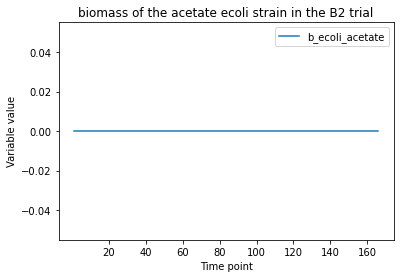

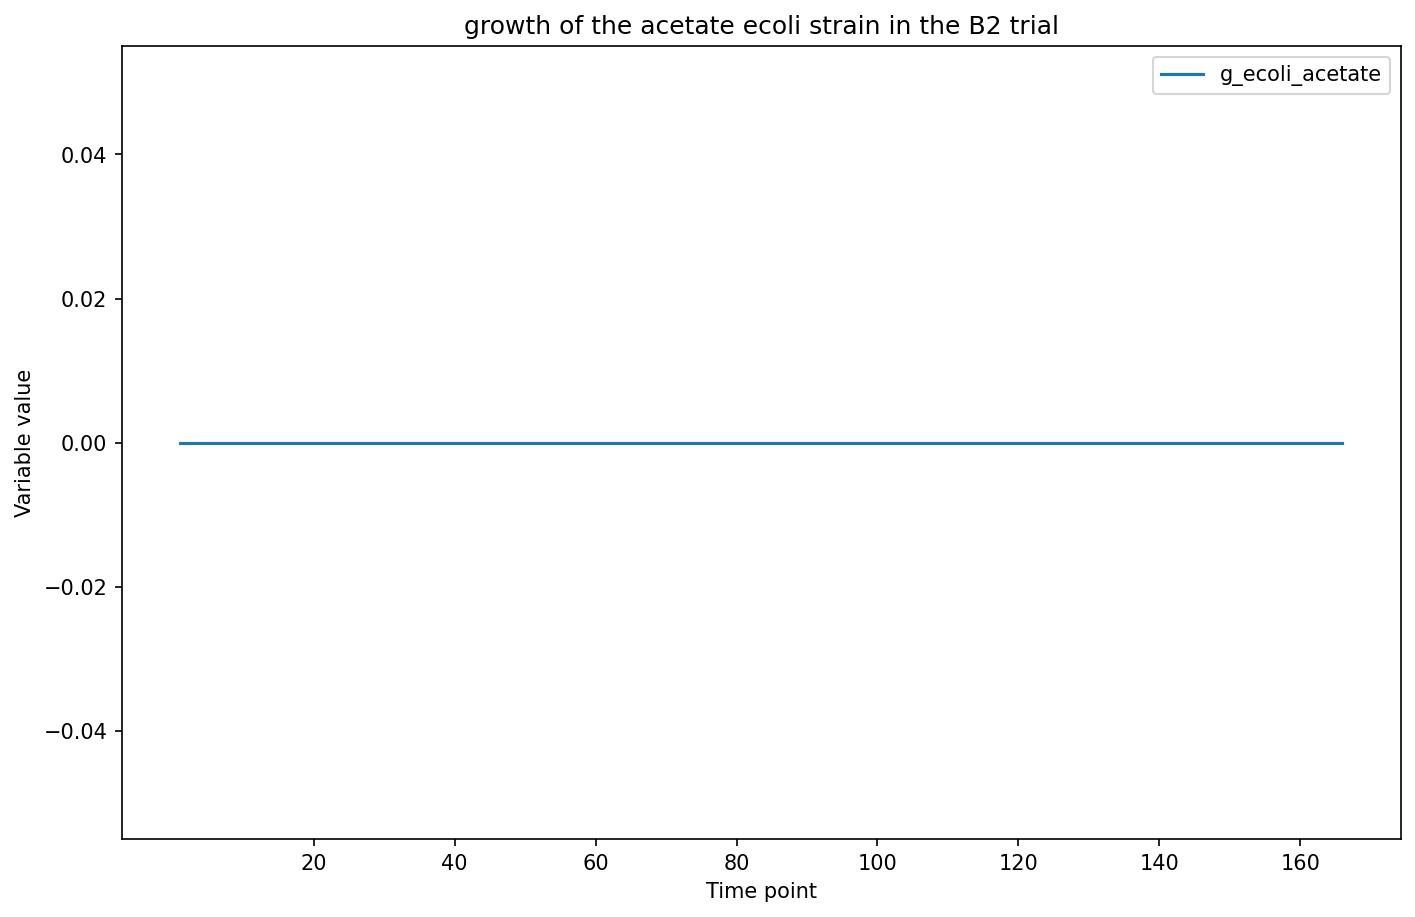

In [2]:
# plot the content for desired trials 
graphs = [
    {
        'trial':'B2',
        'content': 'biomass',
        'species': 'ecoli',
        'strain': 'acetate'
    },
    {
        'trial':'B2',
        'content': 'growth',
        'species': 'ecoli',
        'strain': 'acetate'
    }   
]

%time mscommfit2.compute(graphs)

In [4]:
print(mscommfit2.problem.objective.value)

-6495000.0


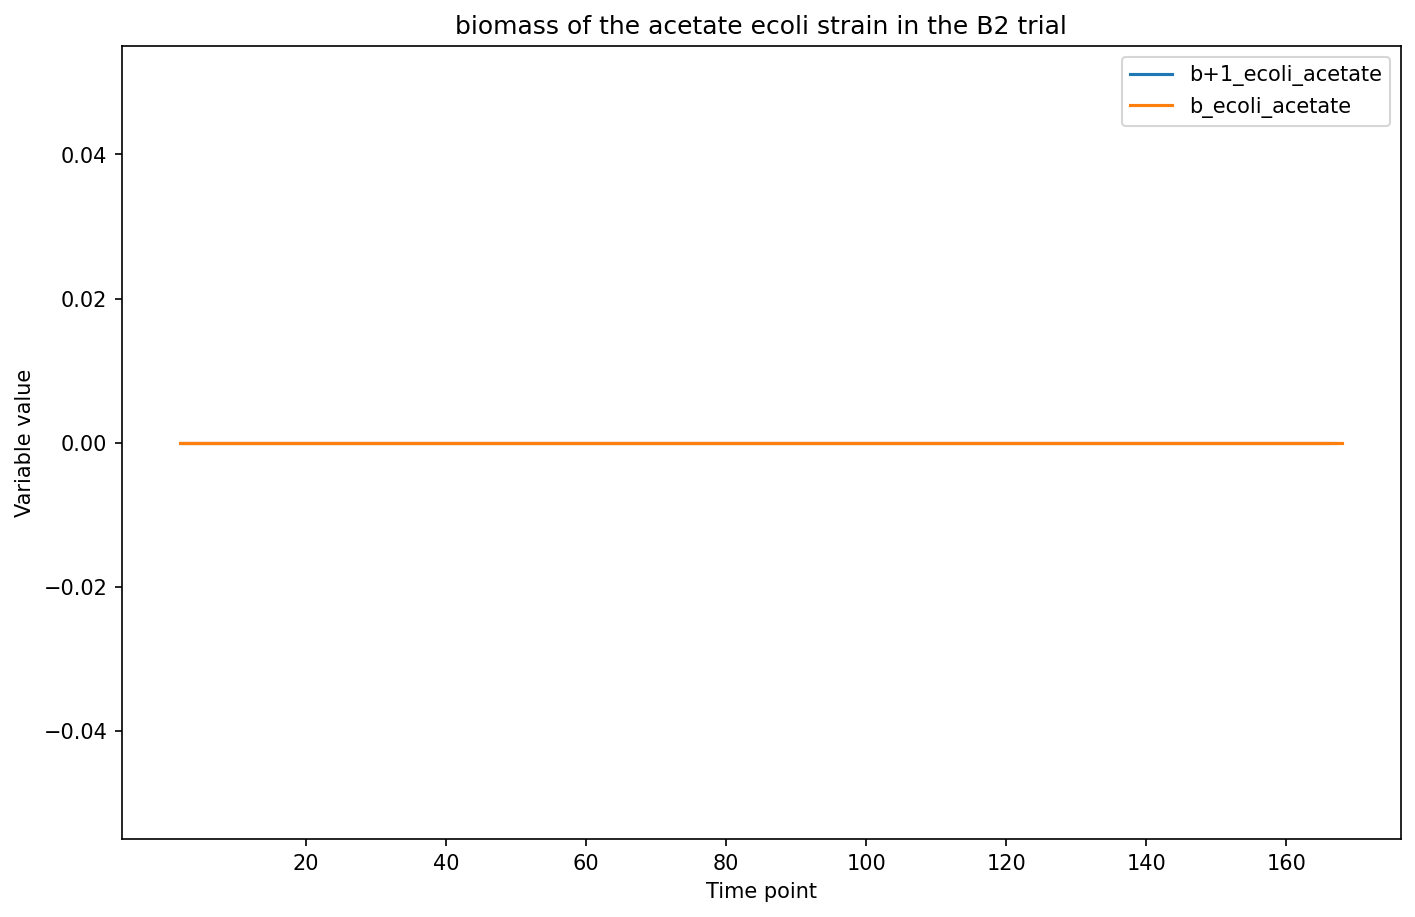

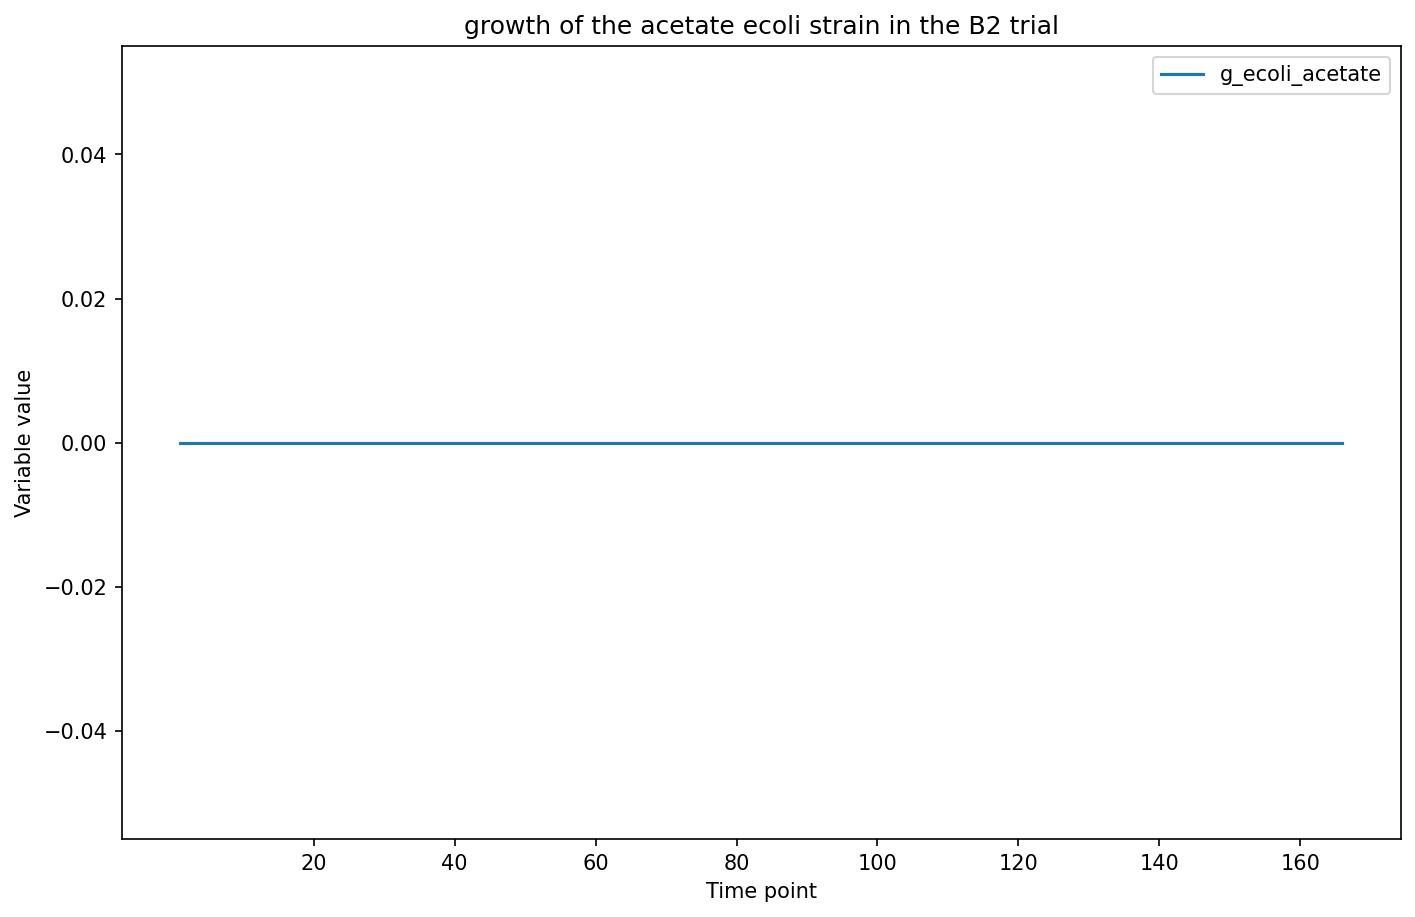

In [11]:
from pprint import pprint
from matplotlib import pyplot
from numpy import array

# for variable, content in mscommfit.problem.primal_values.items():
#     if content != 0:
#         print(variable, content)
    # print(content, mscommfit.problem.primal_values[content])
    # if count > 100:
    #     break
    
# categorize the primal values by trial and time
values = {}
for variable, value in mscommfit2.problem.primal_values.items():
    if 'conversion' not in variable:
        basename, trial, time = variable.split('-')
        if not trial in values:
            values[trial]:dict = {}
        if basename not in values[trial]:
            values[trial][basename]:dict = {}
        values[trial][basename][time] = value

for graph in graphs:
    pyplot.rcParams['figure.figsize'] = (11, 7)
    pyplot.rcParams['figure.dpi'] = 150
    fig, ax = pyplot.subplots()
    for trial, basenames in values.items():
        content = graph['content']
        if graph['content'] == 'biomass':
            content = 'b'
        if graph['content'] == 'growth':
            content = 'g'   
        if trial == graph['trial']:
            labels:list = []
            for basename in basenames:
                if all([x in basename for x in [graph['species'], graph['strain'], content]]):
                    labels.append(basename)
                    ax.plot(values[trial][basename].keys(), 
                            values[trial][basename].values(),
                            label=basename)
                    ax.legend(labels)
                    ax.set_xticks(list(x for x in values[trial][basename].keys() if int(x)%20 == 0))
            if labels != []:
                ax.set_xlabel('Time point')
                ax.set_ylabel('Variable value')
                ax.set_title(f'{graph["content"]} of the {graph["strain"]} {graph["species"]} strain in the {trial} trial')
                fig.savefig(f'{"_".join([trial, graph["species"], graph["strain"], graph["content"]])}.png')

# sans zipping

The ['rxn name', 'rxn'] columns were dropped from the phenotypes CSV.
['ecoli', 'pf', 'OD']
The ['B2', 'B3', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the ecoli measurements.
The ['B2', 'B3', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the pf m

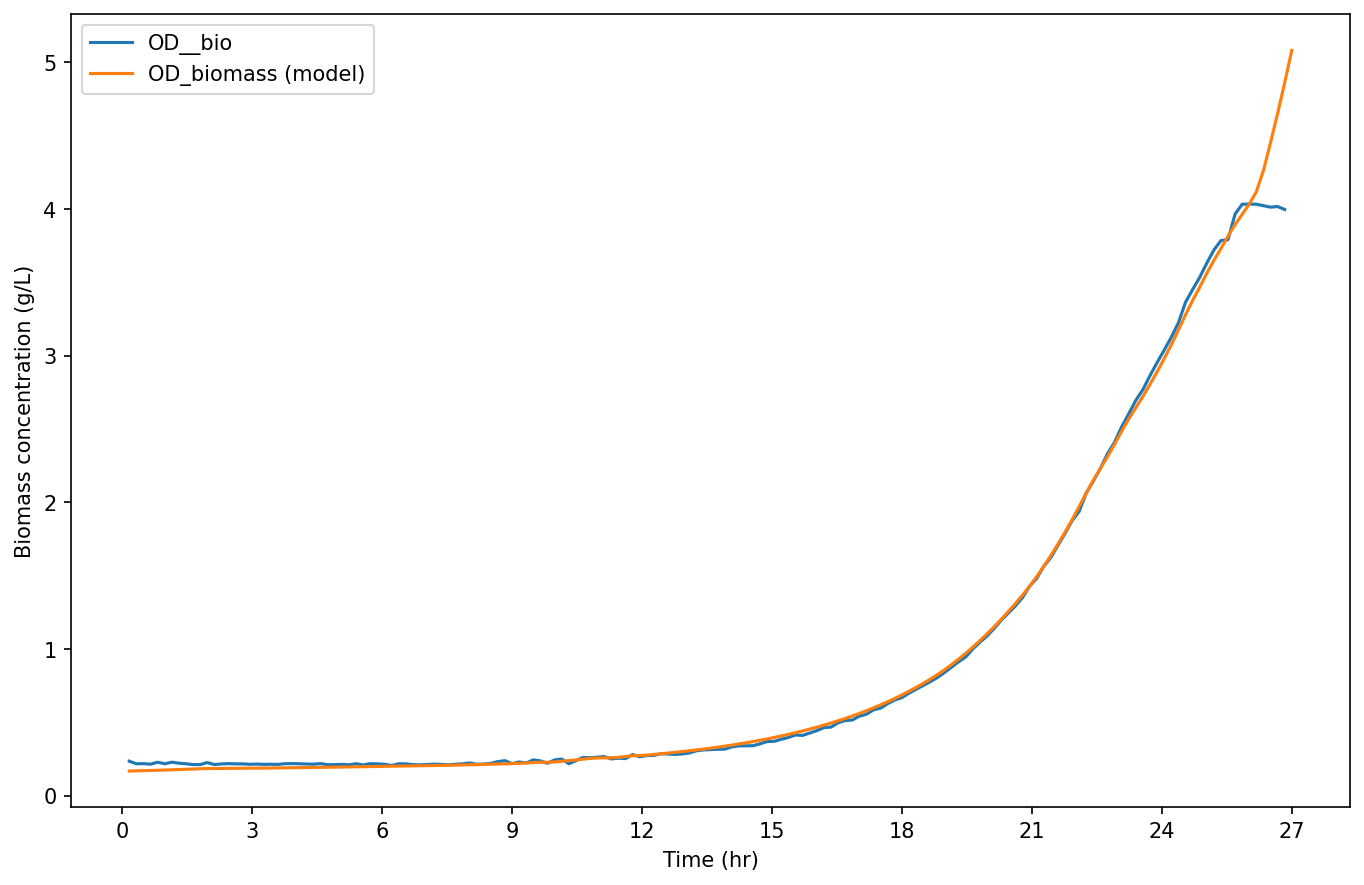

In [12]:
from datetime import datetime
%run mscommfitting.py

graphs = [
    {
        'trial':'B4',
        'content': 'OD',
        'experimental_data': True
    }
]

mscommfit = MSCommFitting()
mscommfit.load_data(phenotypes_csv_path = 'PhenotypeStoichiometry.csv', 
                    signal_tsv_paths = {'RFP_pf-ec_4-29-22.txt':'ecoli', 'GFP_pf-ec_4-29-22.txt':'pf', 'OD_pf-ec_4-29-22.txt':'OD'},
                    media_conc_path = 'media_conc.csv',
                    species_abundance_path = 'species_abundances.csv',
                    carbon_conc_series = {'rows': {
                        'cpd00136': {'B':0, 'C': 0, 'D': 1, 'E': 1, 'F': 4, 'G': 4},
                        'cpd00179': {'B':5, 'C': 5, 'D':5, 'E': 5, 'F': 5, 'G': 5},
                        }},
                    ignore_trials = {'rows': ['C', 'D', 'E', 'F', 'G'], 'columns': [1,2,3,5,6,7,8,9,10,11,12]}, # 'wells': ['C2', 'G3', 'C12']}
                   # ignore_timesteps = [x for x in range(20,167)],
                    # zip_path='mscomfit.zip'
                   )
print(datetime.today())
mscommfit.define_problem(parameters={
                                    'v':0.3,
                                    'cvmin': 100,
                                    'bcv': 100,
                                    'diffpos': 100,
                                    'diffneg': 100
                                    }, 
                         # zip_name='simple_full_community.zip', 
                         final_relative_carbon_conc = 0.1, 
                         metabolites_to_track = ["cpd00179","cpd00029","cpd00136"], 
                         bad_data_timesteps = {'*':'23:'})
print(datetime.today())
%time mscommfit.compute(graphs) #, zip_name='simple_full_community.zip')
print(datetime.today())
print('growth Vmax:', mscommfit.parameters['v'], 'objective value:', mscommfit.problem.objective.value, '\n\n\n\n')

# primal_value parsing

In [17]:
from zipfile import ZipFile
import json
with open('simple_full_community/primal_values.json', 'r') as pv:
    primal_values = json.load(pv)

print(primal_values['B4'].keys())

dict_keys(['c_EX_cpd00029_e0', 'c_EX_cpd00136_e0', 'c_EX_cpd00179_e0', 'cvf_ecoli_malt', 'cvt_ecoli_malt', 'b_ecoli_malt', 'g_ecoli_malt', 'cvf_ecoli_acetate', 'cvt_ecoli_acetate', 'b_ecoli_acetate', 'g_ecoli_acetate', 'cvf_pf_acetate', 'cvt_pf_acetate', 'b_pf_acetate', 'g_pf_acetate', 'cvf_pf_4HB', 'cvt_pf_4HB', 'b_pf_4HB', 'g_pf_4HB', 'b_ecoli_stationary', 'g_ecoli_stationary', 'b_pf_stationary', 'g_pf_stationary', 'RFP__bio', 'RFP__diffpos', 'RFP__diffneg', 'GFP__bio', 'GFP__diffpos', 'GFP__diffneg', 'OD__bio', 'OD__diffpos', 'OD__diffneg'])


# phenotype-metabolite association 

In [ ]:
phenotype_met = {
    'ecoli_malt': 'cpd00179'
}


# media-model integration

In [20]:
import os, re
local_cobrakbase_path = os.path.join('C:', 'Users', 'Andrew Freiburger','Documents','Argonne','cobrakbase')
os.environ["HOME"] = local_cobrakbase_path
import cobrakbase
kbase = cobrakbase.KBaseAPI('6MLTVYGHR6Y6V32DX255AVC53U2NDY7X')
media = kbase.get_from_ws('93465/17/1')
print(dir(media))
data = {}
for content in media.data['mediacompounds']:
    print(content)
    cpd_id = re.search('(?<=id\/)(.+$)', content.compound_ref)

cobrakbase 0.2.8
['__VERSION__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_from_json', '_to_json', '_to_object', 'copied', 'copy_source_inaccessible', 'created', 'creator', 'data', 'data_keys', 'epoch', 'exclude_dict', 'get_data', 'get_media_constraints', 'id', 'info', 'isDefined', 'isMinimal', 'mediacompounds', 'name', 'orig_wsid', 'path', 'provenance', 'reagents', 'refs', 'source_id', 'type']
{'compound_ref': '489/6/5/compounds/id/cpd00099', 'concentration': 0.001, 'id': 'cpd00099', 'inchikey': '', 'maxFlux': 100, 'minFlux': -100, 'name': 'Cl-', 'smiles': ''}
{'compound_ref': '489/6/5/compounds/id/cpd00063', 'concentration': 0.001, 'id': 'cpd00063', 'inchikey': '', 'maxFlux': 100, 'min

In [44]:
from numpy import nan
from pandas import read_csv
media_conc = read_csv("Jeffs_data/media_conc.csv")
# display(media_conc)
# for index, met in media_conc.iterrows():
#     if met["media_compound"] is not nan:
#         print(met["media_compound"], met["mM"])
        
for content in media.data['mediacompounds']:
    print(content)
    if content.id in list(media_conc["media_compound"]):
        print("Yes")
        print(media_conc.iloc[media_conc.index[media_conc["media_compound"] == content.id]]["mM"])
        content.concentration = media_conc.iloc[media_conc.index[media_conc["media_compound"] == content.id]]["mM"].values[0]
    print(content)

{'compound_ref': '489/6/5/compounds/id/cpd00099', 'concentration': 31.564269, 'id': 'cpd00099', 'inchikey': '', 'maxFlux': 100, 'minFlux': -100, 'name': 'Cl-', 'smiles': ''}
Yes
6    31.564269
Name: mM, dtype: float64
{'compound_ref': '489/6/5/compounds/id/cpd00099', 'concentration': 31.564269, 'id': 'cpd00099', 'inchikey': '', 'maxFlux': 100, 'minFlux': -100, 'name': 'Cl-', 'smiles': ''}
{'compound_ref': '489/6/5/compounds/id/cpd00063', 'concentration': 0.01881, 'id': 'cpd00063', 'inchikey': '', 'maxFlux': 100, 'minFlux': -100, 'name': 'Ca2+', 'smiles': ''}
Yes
5    0.01881
Name: mM, dtype: float64
{'compound_ref': '489/6/5/compounds/id/cpd00063', 'concentration': 0.01881, 'id': 'cpd00063', 'inchikey': '', 'maxFlux': 100, 'minFlux': -100, 'name': 'Ca2+', 'smiles': ''}
{'compound_ref': '489/6/5/compounds/id/cpd00048', 'concentration': 3.994371, 'id': 'cpd00048', 'inchikey': '', 'maxFlux': 100, 'minFlux': -100, 'name': 'Sulfate', 'smiles': ''}
Yes
3    3.994371
Name: mM, dtype: float64


In [1]:
from datetime import datetime
from time import process_time
from pandas import set_option
set_option("display.max_rows", None)

# define the environment path 
import os
local_cobrakbase_path = os.path.join('C:', 'Users', 'Andrew Freiburger','Documents','Argonne','cobrakbase')
os.environ["HOME"] = local_cobrakbase_path

# import the models
import cobrakbase
token = 'CKYZK6AZ5V2CT5ILYP7JAXFPW3OLT6VF'
kbase_api = cobrakbase.KBaseAPI(token)
# model1 = kbase_api.get_from_ws("iML1515",76994)
# model2 = kbase_api.get_from_ws("iSB1139.kb.gf",30650)

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


cobrakbase 0.2.8


In [2]:
graphs = [
    {
        'trial':'B4',
        'content': 'biomass',
        # "species": ["ecoli"],
        'experimental_data': True
    },
    {
        'trial':'B4',
        'content': "cpd00029",
    },
    {
        'trial':'B4',
        'content': "cpd00179",
    }
]

# run MSCommFitting
%run mscommfitting.py
time1 = process_time()
mscommfit = MSCommFitting()
mscommfit.load_data(#phenotypes_csv_path = 'PhenotypeStoichiometry.csv', 
                    community_members = {
                        kbase_api.get_from_ws("iML1515",76994): {
                            'name': 'ecoli', 
                            'phenotypes': {#'acetate': kbase_api.get_from_ws('93465/13/1'), 
                                        'malt': {"cpd00179":[-1,-1]} #kbase_api.get_from_ws("93465/23/1")} #'93465/9/1')}   # !!! The phenotype name must align with the experimental IDs for the graphs to find the appropriate data
                            }
                        },
                        kbase_api.get_from_ws("iSB1139.kb.gf",30650): {
                            'name': 'pf',
                            'phenotypes': {'acetate': {"cpd00029":[-1,-1]}, # kbase_api.get_from_ws("93465/25/1"), #'93465/11/1'), 
                                        '4HB': {"cpd00136":[-1,-1]} # kbase_api.get_from_ws('	93465/27/1')} #93465/15/1')}
                            }
                        }
                    },
                    base_media = kbase_api.get_from_ws("93465/19/1"),
                    signal_csv_paths = {'path':'data/Jeffs_data/PF-EC 4-29-22 ratios and 4HB changes.xlsx', 'Raw OD(590)':'OD', 'mNeonGreen':'pf', 'mRuby':'ecoli'},
                    carbon_conc_series = {'rows': {
                        'cpd00136': {'B':0, 'C': 0, 'D': 1, 'E': 1, 'F': 4, 'G': 4},
                        'cpd00179': {'B':5, 'C': 5, 'D':5, 'E': 5, 'F': 5, 'G': 5},
                        }},
                    ignore_trials = {'rows': ['C', 'D', 'E', 'F', 'G'], 'columns': [1,2,3,5,6,7,8,9,10,11,12]}, # 'wells': ['C2', 'G3', 'C12']}
                   # ignore_timesteps = [x for x in range(20,167)],
                    # zip_path='mscomfit.zip'
                   )
time2 = process_time()
print(datetime.today(), (time2-time1)/60, 'minutes later')

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


The ['B2', 'B3', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements.
The ['B2', 'B3', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the pf measurements.
The ['B2', 'B3', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C

### with bad_data_timesteps

Done with concentrations and biomass loops: 0.0010416666666666667 min
Done with DCC loop: 0.00026041666666666666 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.08489583333333334 min
Done exporting the content: 0.016927083333333332 min
2022-09-19 20:32:16.513139
graph_0
{'content': 'biomass',
 'experimental_data': True,
 'phenotype': {'stationary', 'malt', 'acetate', '4HB'},
 'species': ['OD', 'pf', 'ecoli'],
 'trial': 'B4'}
all content over all phenotypes
all content over all phenotypes
all content over all phenotypes
all content over all phenotypes
all content over all phenotypes
graph_1
{'content': 'cpd00029',
 'phenotype': {'stationary', 'malt', 'acetate', '4HB'},
 'species': ['OD', 'pf', 'ecoli'],
 'trial': 'B4'}
media concentration
graph_2
{'content': 'cpd00179',
 'phenotype': {'stationary', 'malt', 'acetate', '4HB'},
 'species': ['OD', 'pf', 'ecoli'],
 'tri

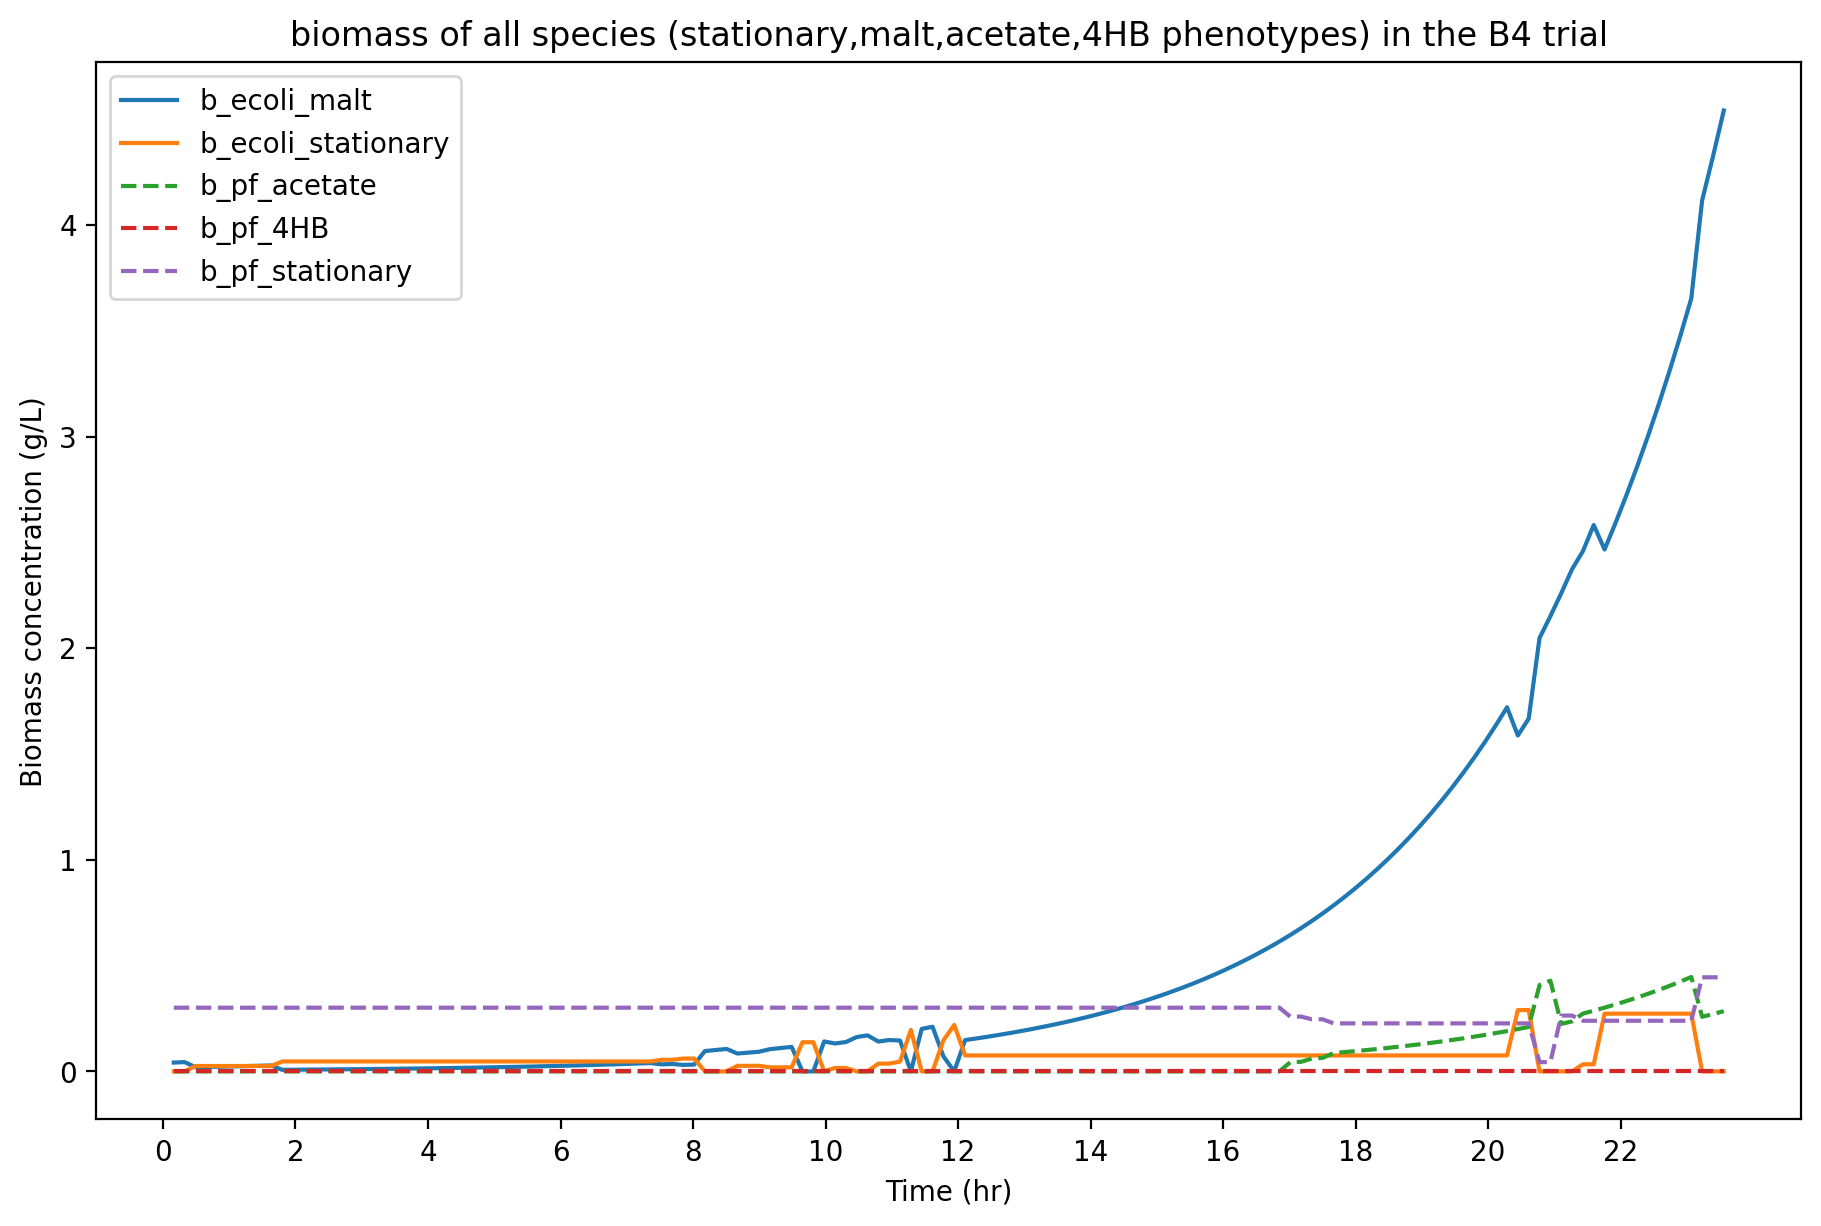

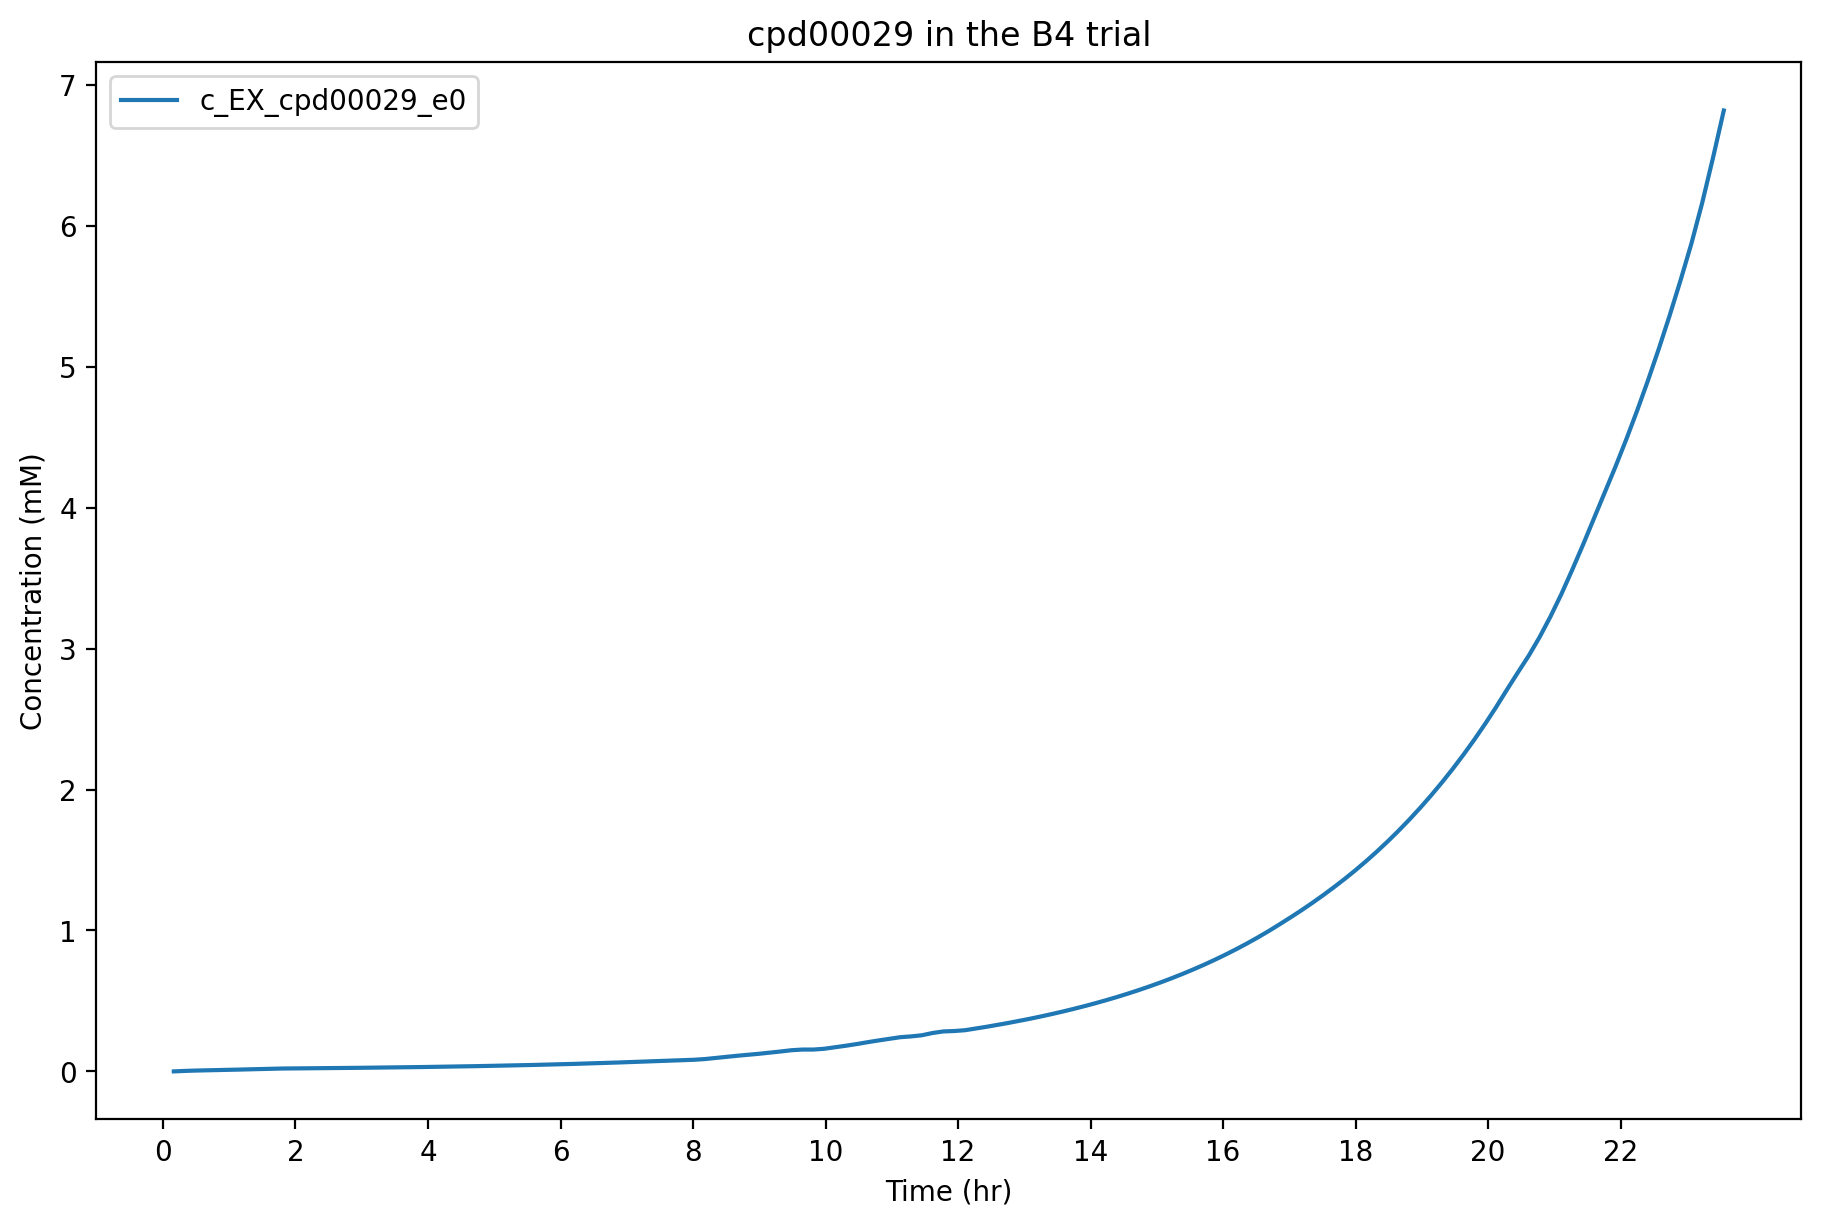

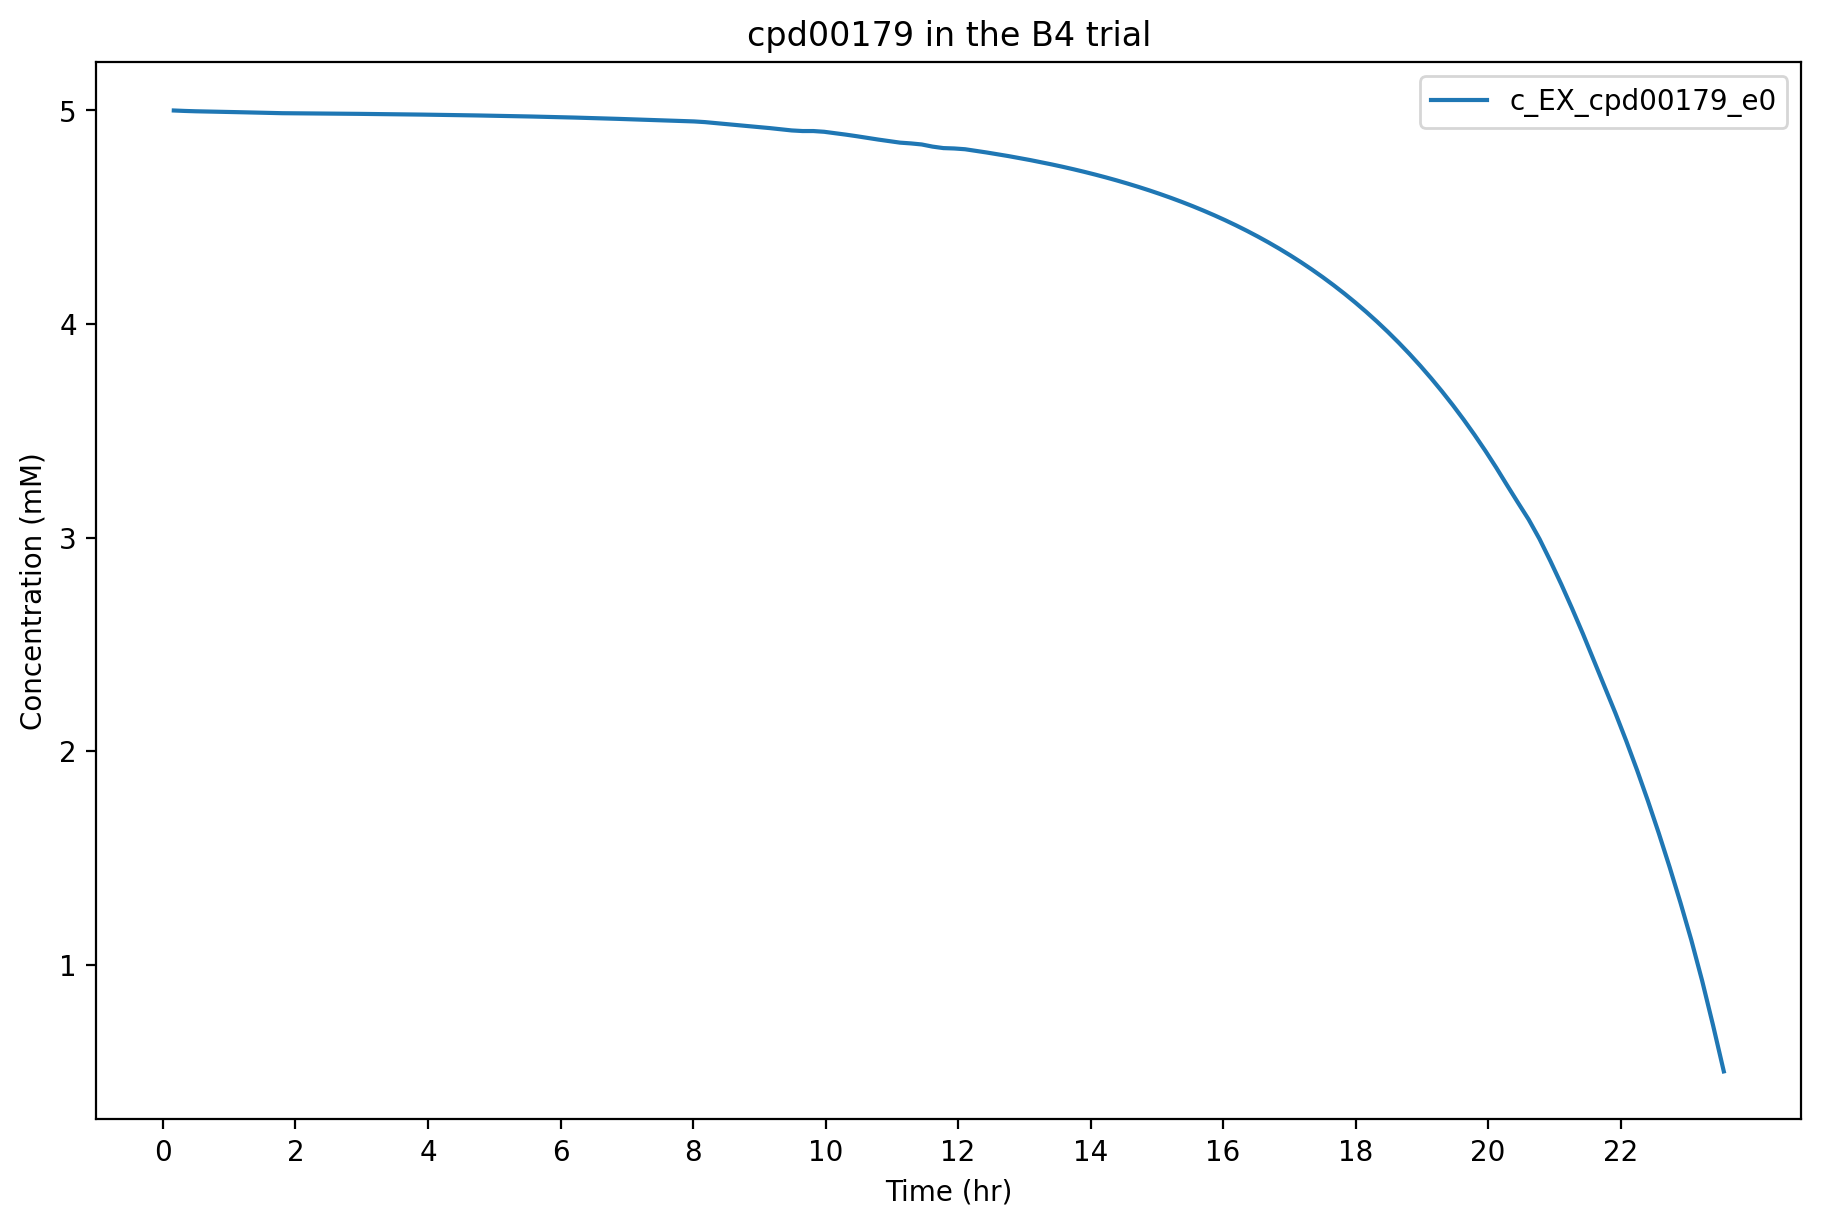

In [3]:
mscommfit.define_problem(parameters={
                                    'v':0.3,
                                    'cvmin': 100,
                                    'bcv': 100,
                                    'diffpos': 100,
                                    'diffneg': 100
                                    }, 
                         # zip_name='simple_full_community.zip', 
                         final_rel_c12_conc = 0.1, 
                         mets_to_track = ["cpd00179","cpd00029","cpd00136"], 
                         bad_data_timesteps = {'*':'145:'}, zero_start=["cpd00029"])
print(datetime.today())
%time mscommfit.compute(graphs) #, zip_name='simple_full_community.zip')
print('growth Vmax:', mscommfit.parameters['v'], 'objective value:', mscommfit.problem.objective.value, '\n\n\n\n')

### sans bad_data_timesteps

Done with concentrations and biomass loops: 0.0015625 min
Done with DCC loop: 0.0005208333333333333 min
Done with the dbc & diffc loop: 0.003125 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.09583333333333334 min
Done exporting the content: 0.020052083333333335 min
2022-09-19 20:33:43.283716
graph_0
{'content': 'biomass',
 'experimental_data': True,
 'phenotype': {'stationary', '4HB', 'malt', 'acetate'},
 'species': ['OD', 'pf', 'ecoli'],
 'trial': 'B4'}
all content over all phenotypes
all content over all phenotypes
all content over all phenotypes
all content over all phenotypes
all content over all phenotypes
graph_1
{'content': 'cpd00029',
 'phenotype': {'stationary', '4HB', 'malt', 'acetate'},
 'species': ['OD', 'pf', 'ecoli'],
 'trial': 'B4'}
media concentration
graph_2
{'content': 'cpd00179',
 'phenotype': {'stationary', '4HB', 'malt', 'acetate'},
 'species': ['OD', 'pf', 'ecoli'],
 'trial': 'B4'}
media concentra

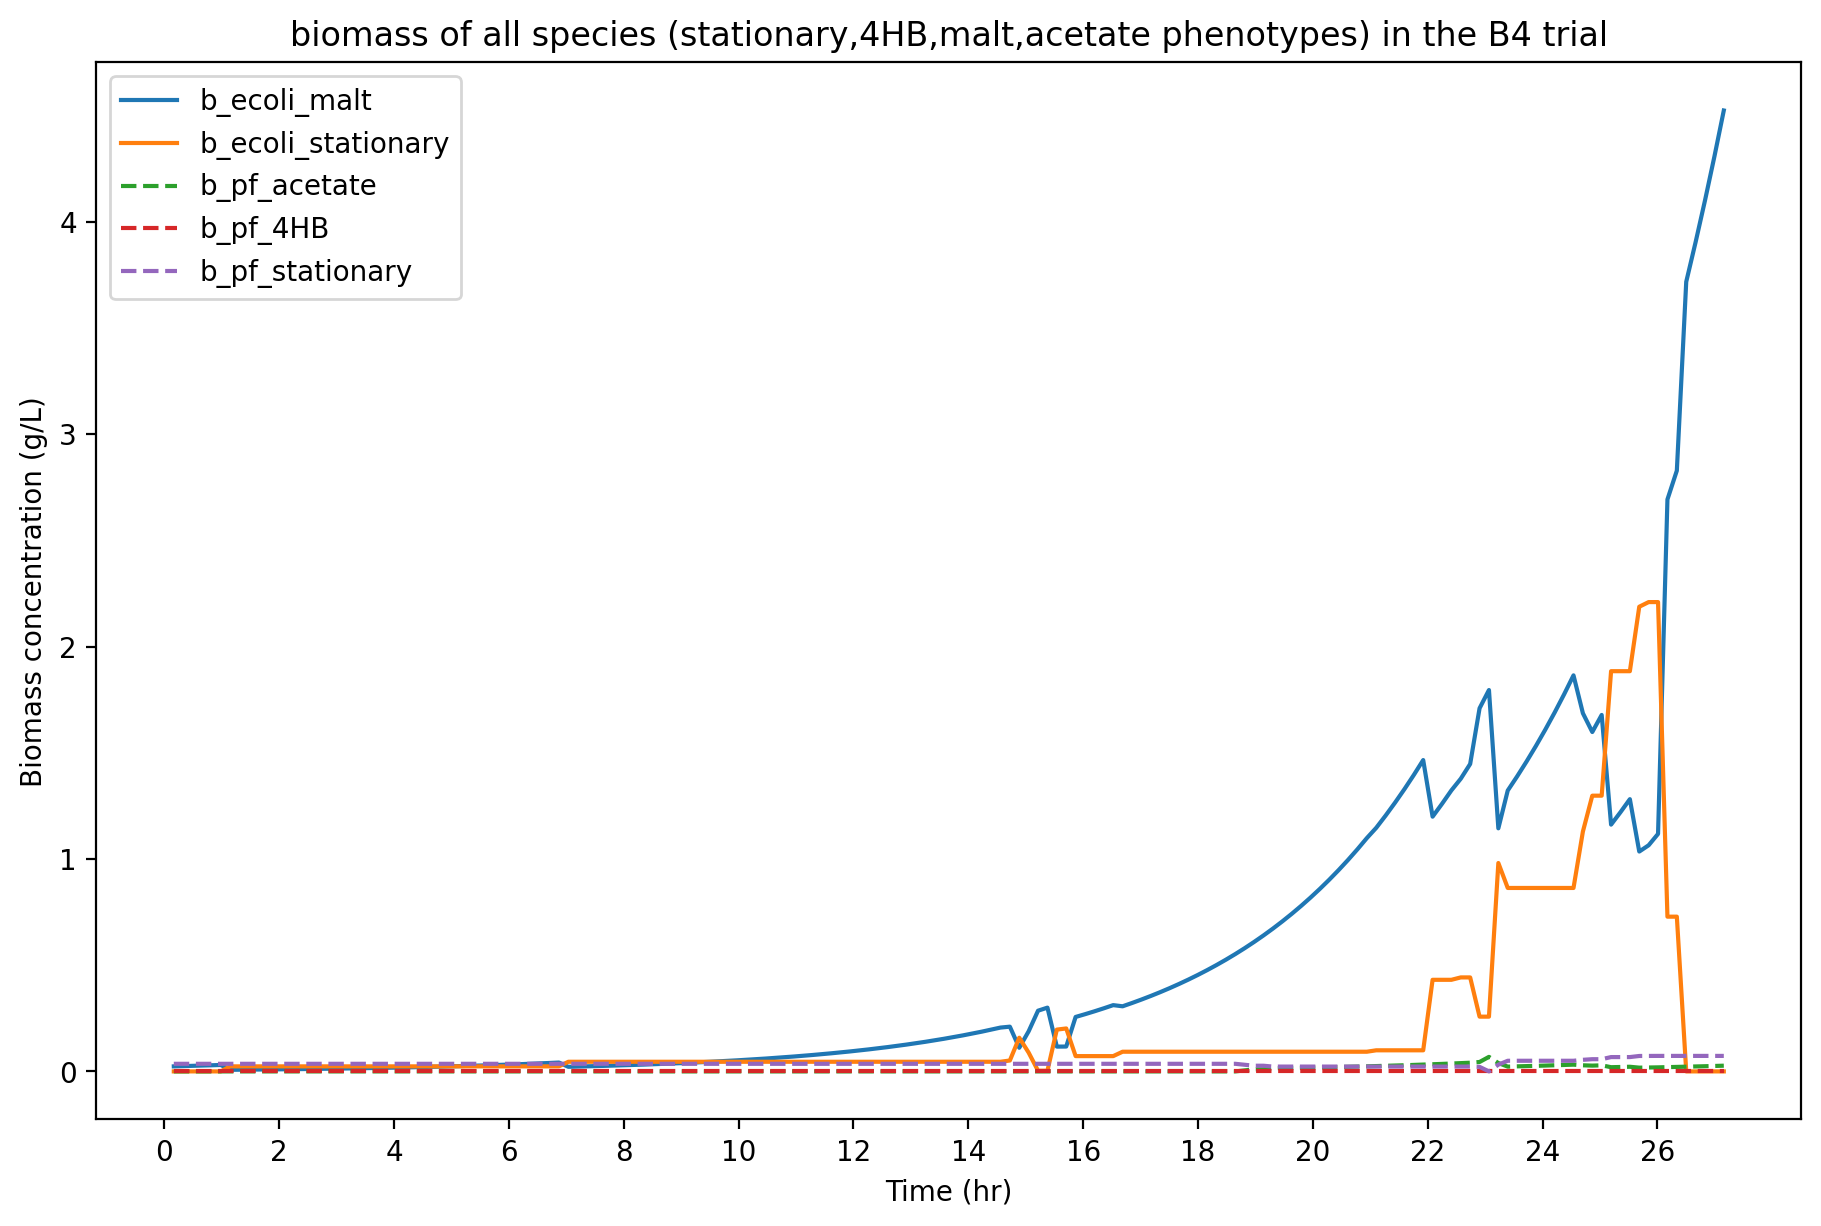

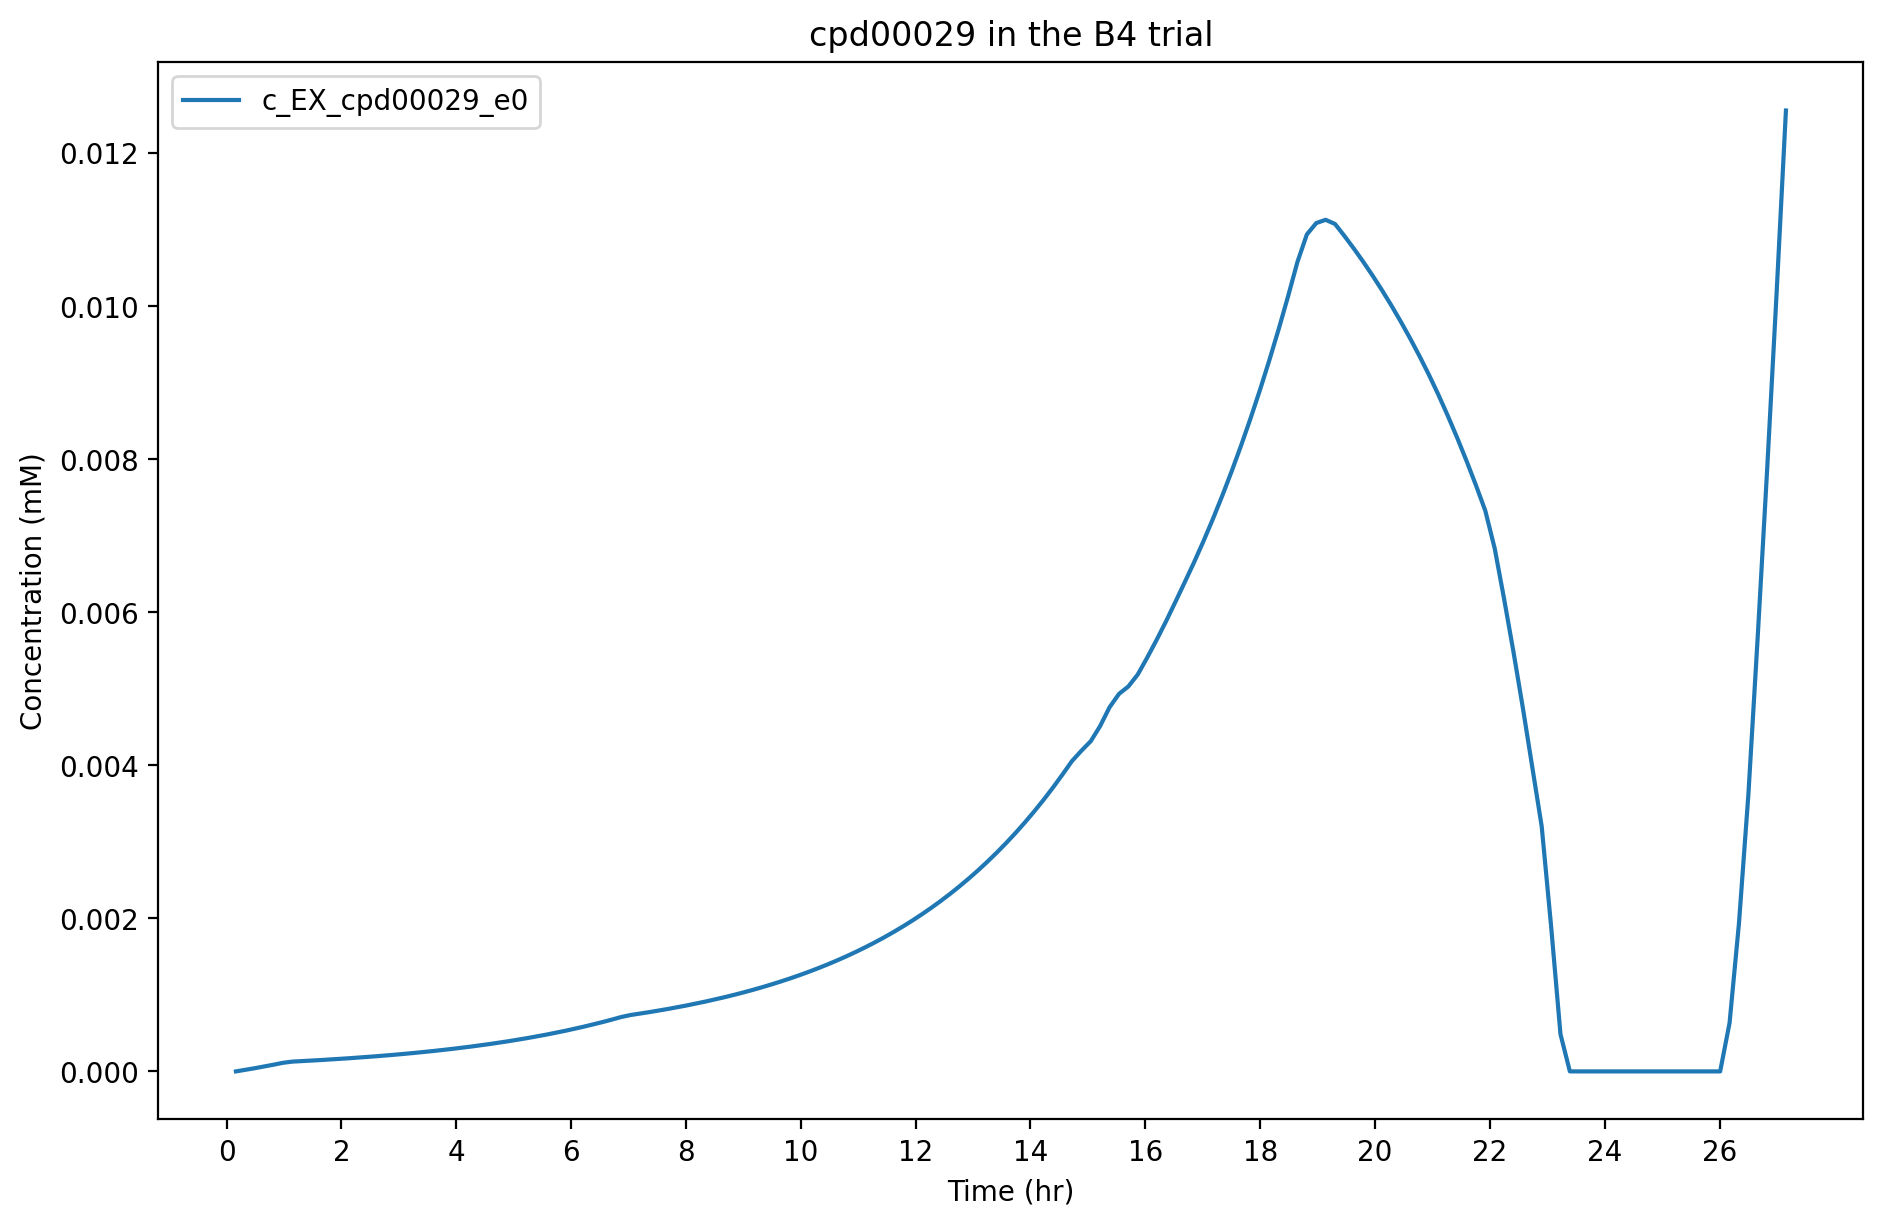

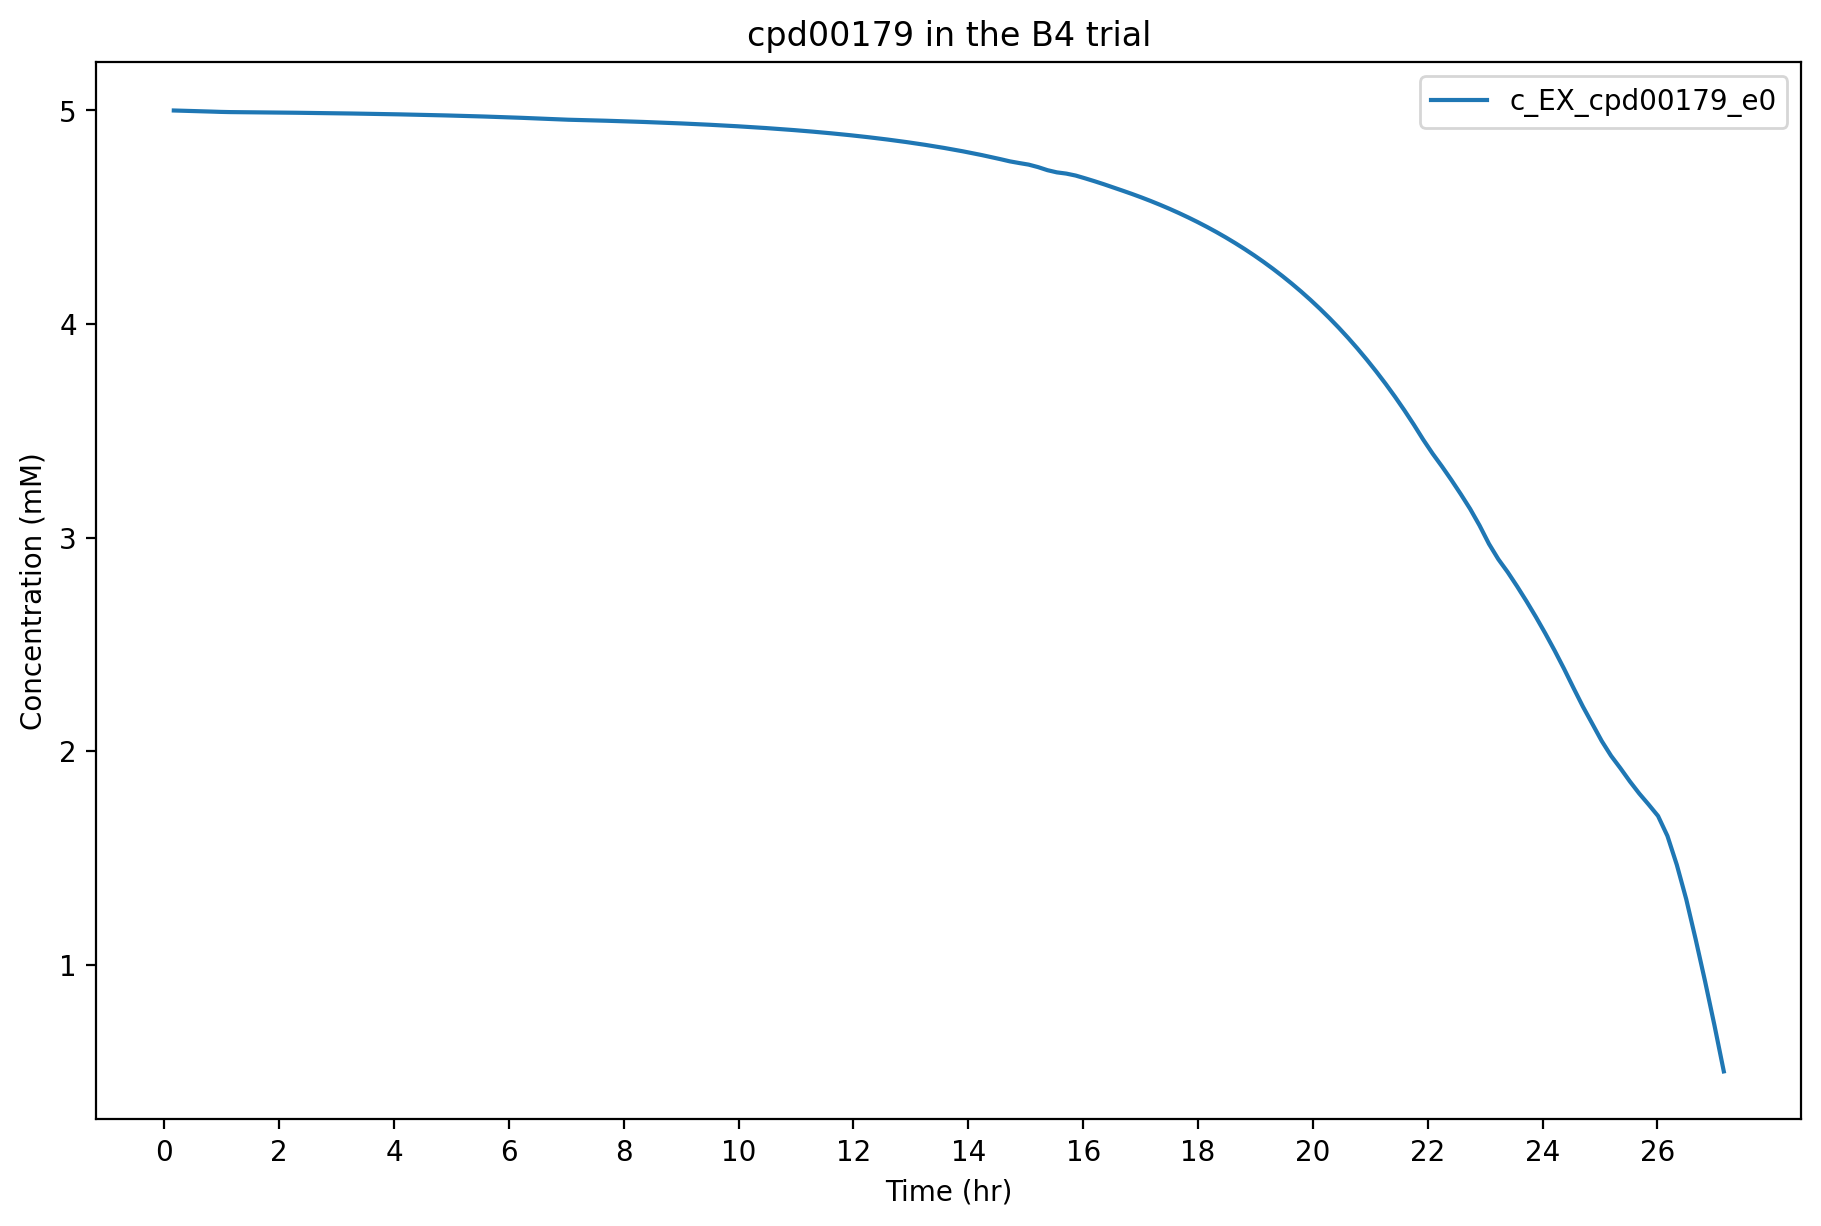

In [3]:
mscommfit.define_problem(parameters={
                                    'v':0.3,
                                    'cvmin': 100,
                                    'bcv': 100,
                                    'diffpos': 100,
                                    'diffneg': 100
                                    }, 
                         # zip_name='simple_full_community.zip', 
                         final_rel_c12_conc = 0.1, 
                         mets_to_track = ["cpd00179","cpd00029","cpd00136"], 
                         zero_start=["cpd00029"])
print(datetime.today())
%time mscommfit.compute(graphs) #, zip_name='simple_full_community.zip')
print('growth Vmax:', mscommfit.parameters['v'], 'objective value:', mscommfit.problem.objective.value, '\n\n\n\n')

# Define the system via KBase objects

In [1]:
# define the environment path 
import os
local_cobrakbase_path = os.path.join('C:', 'Users', 'Andrew Freiburger','Documents','Argonne','cobrakbase')
os.environ["HOME"] = local_cobrakbase_path

# import the models
import cobrakbase
token = '6MLTVYGHR6Y6V32DX255AVC53U2NDY7X'
kbase_api = cobrakbase.KBaseAPI(token)
# model1 = kbase_api.get_from_ws("iML1515",76994)
# model2 = kbase_api.get_from_ws("iSB1139.kb.gf",30650)

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


cobrakbase 0.2.8


In [2]:
from datetime import datetime
from time import process_time
# import the KBase objects
graphs = [
    {
        'trial':'B4',
        'content': 'OD',
        'experimental_data': True
    }
]

# run MSCommFitting
%run mscommfitting.py
time1 = process_time()
mscommfit = MSCommFitting()
mscommfit.load_data(community_members = {
                        kbase_api.get_from_ws("iML1515",76994): {
                            'name': 'ecoli', 
                            'phenotypes': {#'acetate': kbase_api.get_from_ws('93465/13/1'), 
                                        'maltose': {"cpd00179":[-1,-1]} #kbase_api.get_from_ws("93465/23/1")} #'93465/9/1')}
                            }
                        },
                        kbase_api.get_from_ws("iSB1139.kb.gf",30650): {
                            'name': 'pf',
                            'phenotypes': {'acetate': {"cpd00029":[-1,-1]}, # kbase_api.get_from_ws("93465/25/1"), #'93465/11/1'), 
                                        '4HB': {"cpd00136":[-1,-1]} # kbase_api.get_from_ws('	93465/27/1')} #93465/15/1')}
                            }
                        }
                    },
                    base_media = kbase_api.get_from_ws("93465/19/1"),
                    signal_csv_paths = {'path':'Jeffs_data/PF-EC 4-29-22 ratios and 4HB changes (1).xlsx', 'Raw OD(590)':'OD', 'mNeonGreen':'pf', 'mRuby':'ecoli'},
                    media_conc_path = 'media_conc.csv',
                    carbon_conc_series = {'rows': {
                        'cpd00136': {'B':0, 'C': 0, 'D': 1, 'E': 1, 'F': 4, 'G': 4},
                        'cpd00179': {'B':5, 'C': 5, 'D':5, 'E': 5, 'F': 5, 'G': 5},
                        }},
                    ignore_trials = {'rows': ['C', 'D', 'E', 'F', 'G'], 'columns': [1,2,3,5,6,7,8,9,10,11,12]}, # 'wells': ['C2', 'G3', 'C12']}
                   # ignore_timesteps = [x for x in range(20,167)],
                    # zip_path='mscomfit.zip'
                   )
time2 = process_time()
print(datetime.today(), (time2-time1)/60, 'minutes later')
mscommfit.define_problem(parameters={
                                    'v':0.3,
                                    'cvmin': 100,
                                    'bcv': 100,
                                    'diffpos': 100,
                                    'diffneg': 100
                                    }, 
                         # zip_name='simple_full_community.zip', 
                         final_relative_carbon_conc = 0.1, 
                         metabolites_to_track = ["cpd00179","cpd00029","cpd00136"], 
                         bad_data_timesteps = {'*':'23:'})
print(datetime.today())
%time mscommfit.compute(graphs) #, zip_name='simple_full_community.zip')
print('growth Vmax:', mscommfit.parameters['v'], 'objective value:', mscommfit.problem.objective.value, '\n\n\n\n')

The ['B2', 'B3', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements.
The ['B2', 'B3', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the pf measurements.
The ['B2', 'B3', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C

NoFluxError: The simulation lacks any flux.

growth Vmax: 0.3 objective value: 0.0 






In [6]:
media = kbase_api.get_from_ws("93465/19/1")
# print(type(media))
display(media.mediacompounds)

[{'compound_ref': 'kbase/default/compounds/id/cpd00058',
  'concentration': 0.00088,
  'id': 'cpd00058',
  'inchikey': '',
  'maxFlux': 100,
  'minFlux': -100,
  'name': 'Cu2+',
  'smiles': ''},
 {'compound_ref': 'kbase/default/compounds/id/cpd00240',
  'concentration': 0.002257,
  'id': 'cpd00240',
  'inchikey': '',
  'maxFlux': 100,
  'minFlux': -100,
  'name': 'EDTA',
  'smiles': ''},
 {'compound_ref': 'kbase/default/compounds/id/cpd00793',
  'concentration': 2.66e-06,
  'id': 'cpd00793',
  'inchikey': '',
  'maxFlux': 100,
  'minFlux': -100,
  'name': 'Thiamine phosphate',
  'smiles': ''},
 {'compound_ref': 'kbase/default/compounds/id/cpd11574',
  'concentration': 0.001033,
  'id': 'cpd11574',
  'inchikey': '',
  'maxFlux': 100,
  'minFlux': -100,
  'name': 'Molybdate',
  'smiles': ''},
 {'compound_ref': 'kbase/default/compounds/id/cpd00009',
  'concentration': 69.943,
  'id': 'cpd00009',
  'inchikey': '',
  'maxFlux': 100,
  'minFlux': -100,
  'name': 'Phosphate',
  'smiles': ''},

In [5]:
for var, val in mscommfit.problem.primal_values.items():
    print(type(var), type(val))
    break
    if "conversion" not in var:
        print(val)

<class 'str'> <class 'float'>
